In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
challenge_set_updated = pd.read_csv('./data/challenge_set_updated_v18.csv')
submission_set_updated = pd.read_csv('./data/submission_set_updated_v18.csv')
submission = pd.read_csv('catboost_submission.csv')

In [3]:
tow = challenge_set_updated['tow'].sort_values()
print(tow)

100214     14944.0
146622     15890.0
302645     15890.0
232169     15890.0
132193     15901.0
            ...   
238729    351327.0
349963    351327.0
197315    351327.0
234622    351327.0
166903    351327.0
Name: tow, Length: 369013, dtype: float64


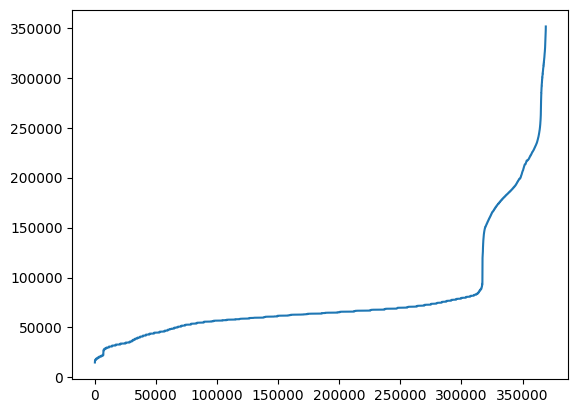

In [4]:
plt.plot(tow.to_numpy())

In [5]:
aircraft_types = challenge_set_updated['aircraft_type'].unique()

A320 Large (79761, 216)
B772 Heavy (8322, 216)
A333 Heavy (17011, 216)
B788 Heavy (5960, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
B789 Heavy (5734, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
B77W Heavy (9162, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
B763 Heavy (1190, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)
A359 Heavy (1725, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_102940\1378430332.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


A332 Heavy (2241, 216)
B39M Large (542, 216)
A343 Heavy (480, 216)
A310 Heavy (2, 216)
B752 Large (6, 216)
B773 Heavy (1, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


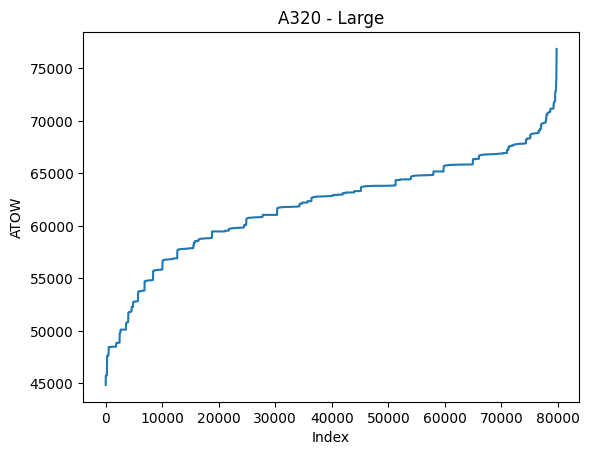

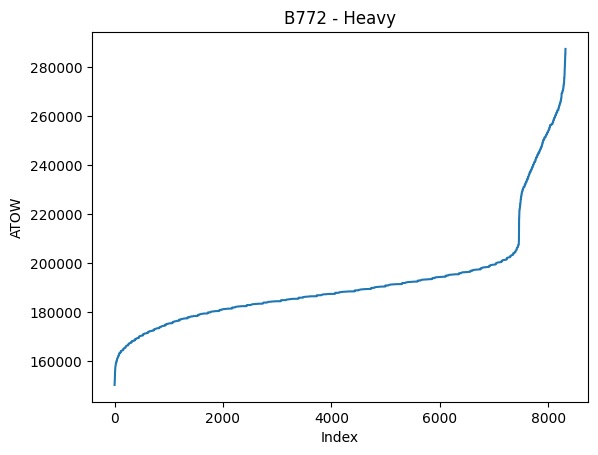

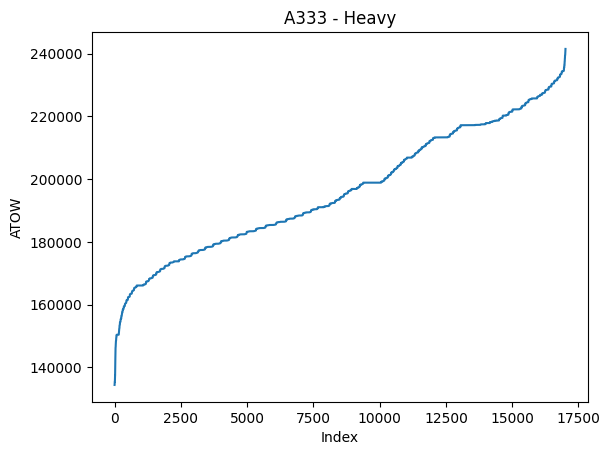

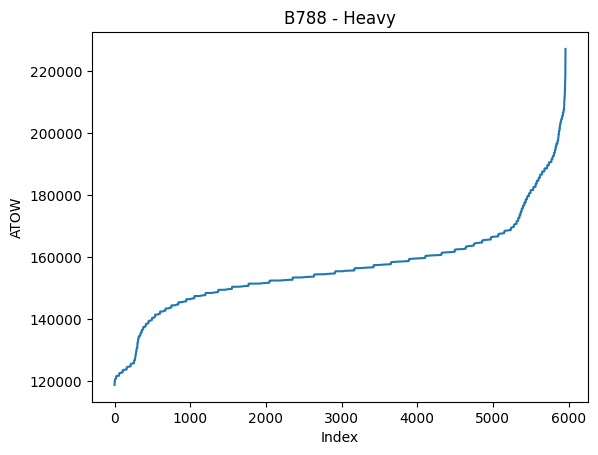

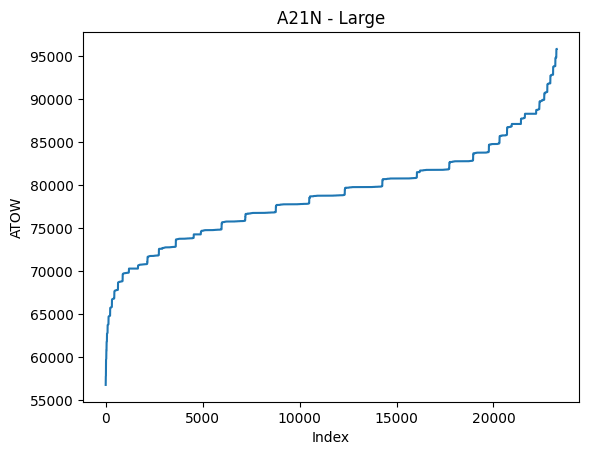

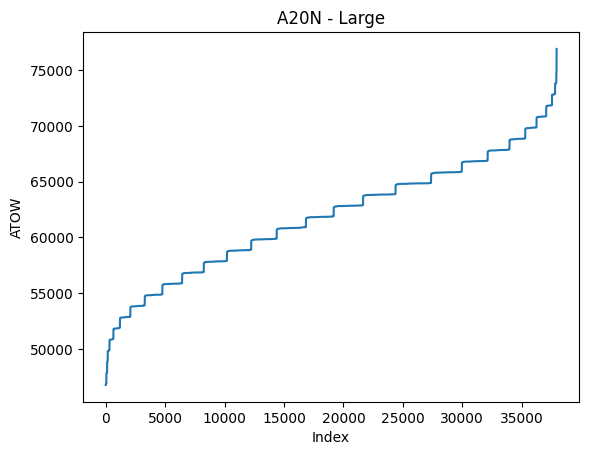

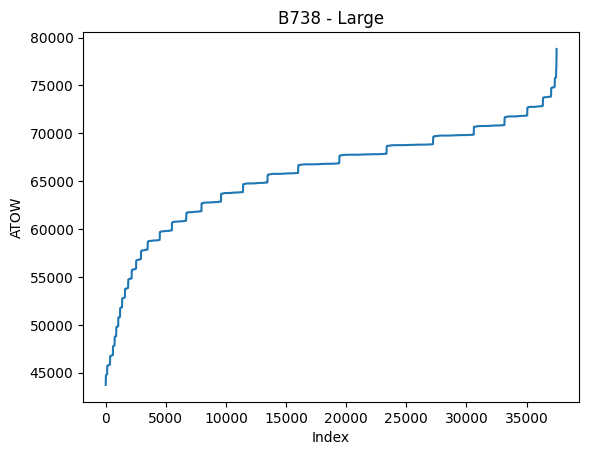

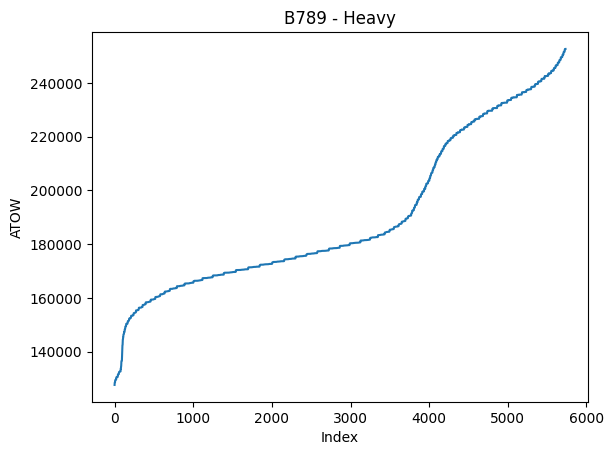

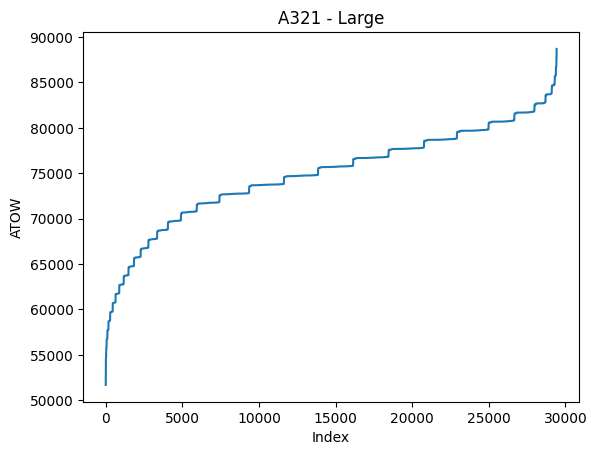

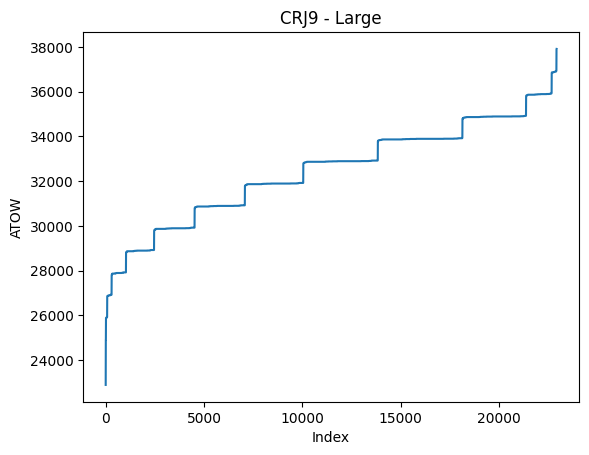

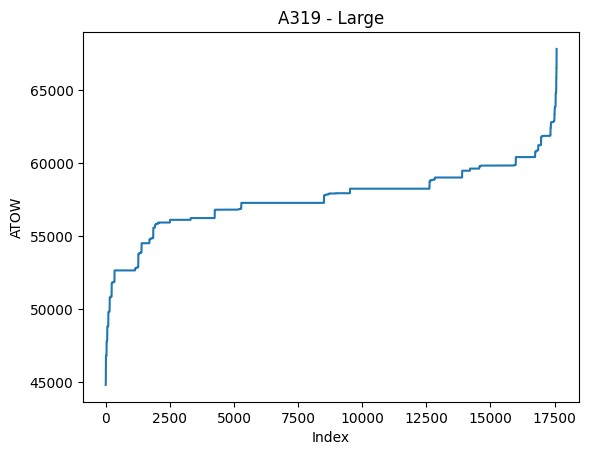

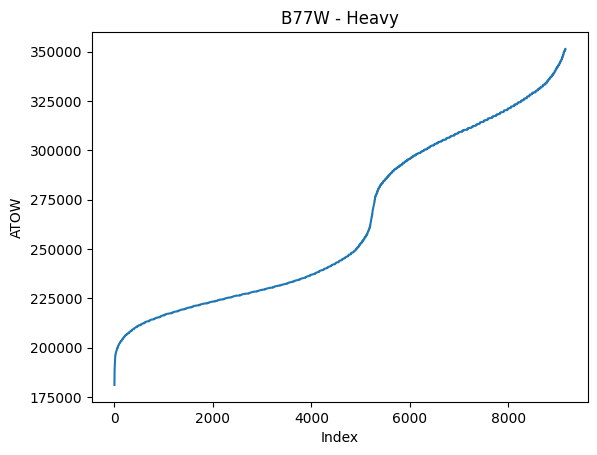

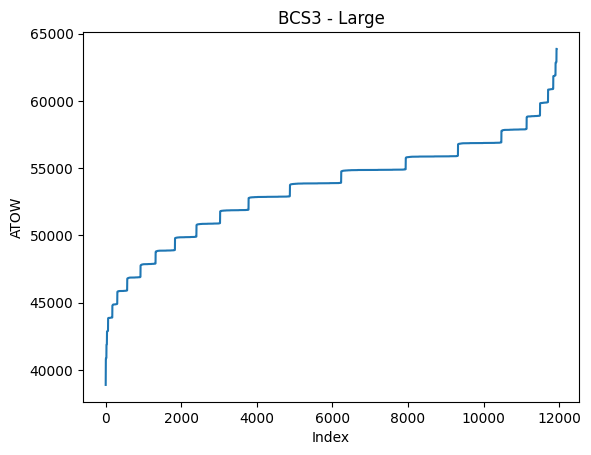

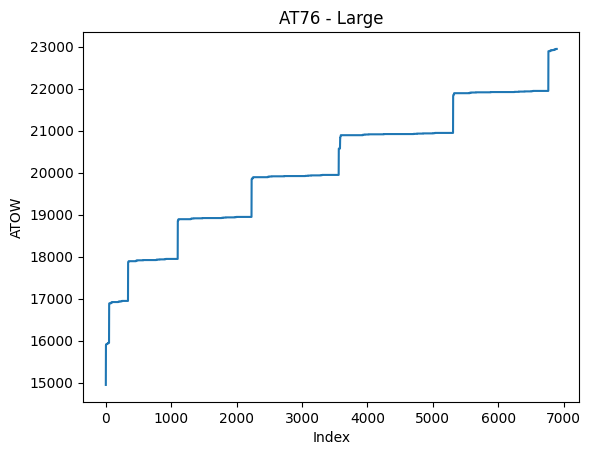

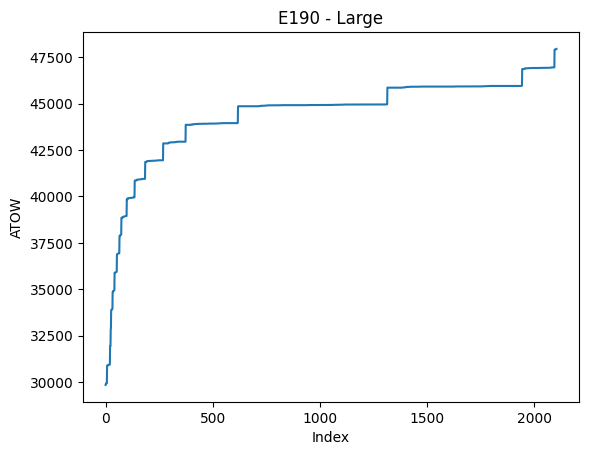

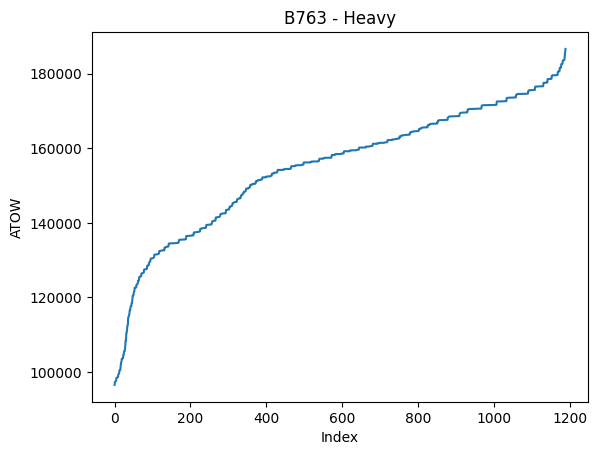

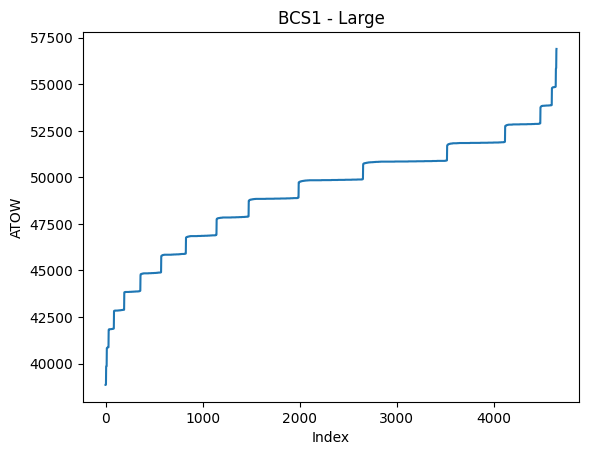

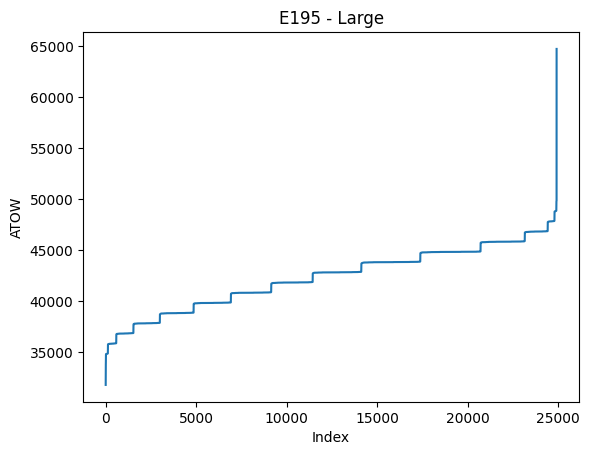

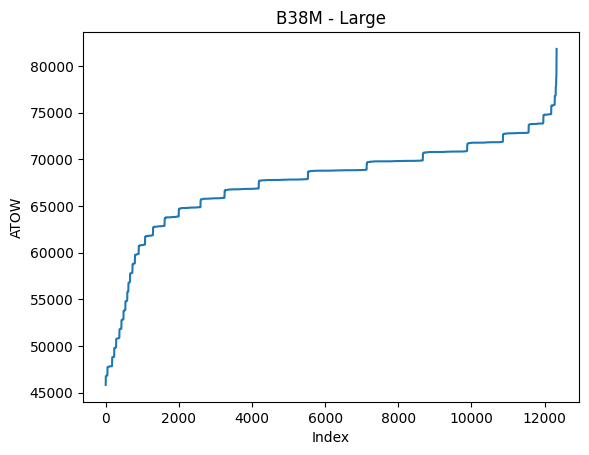

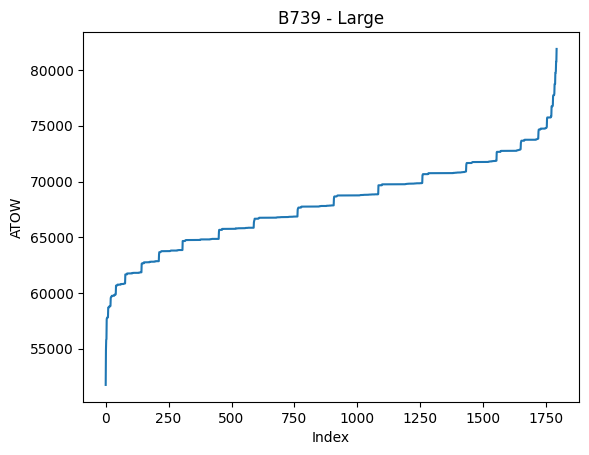

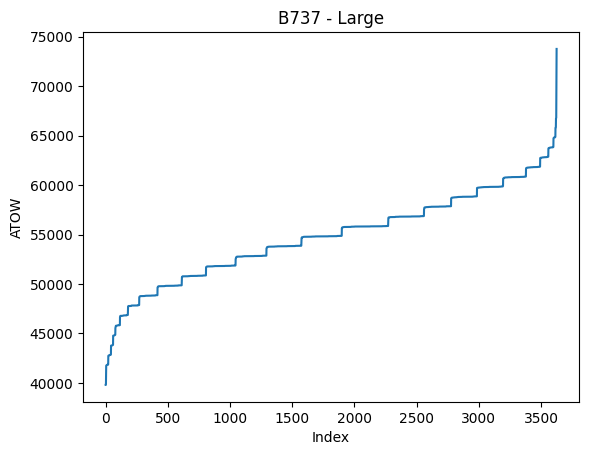

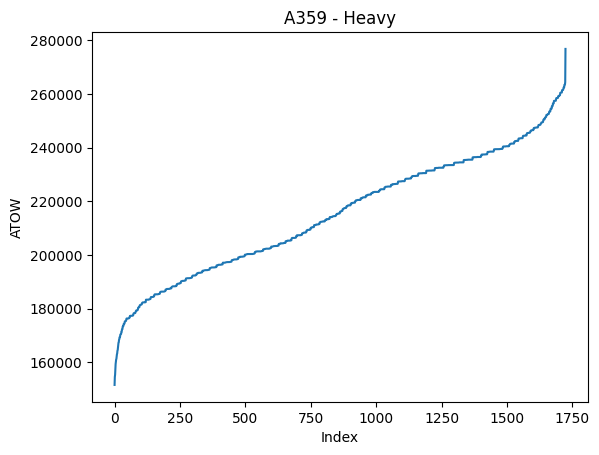

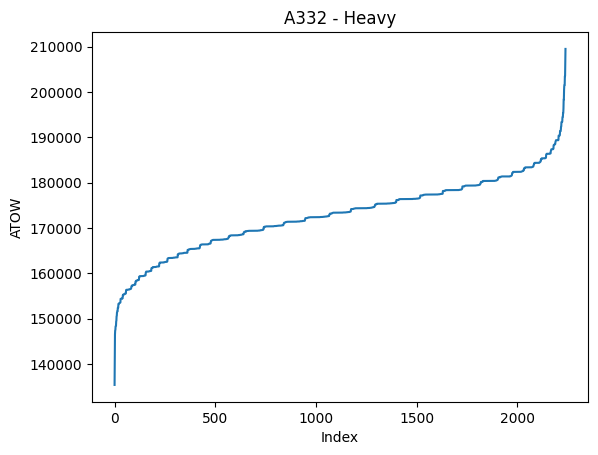

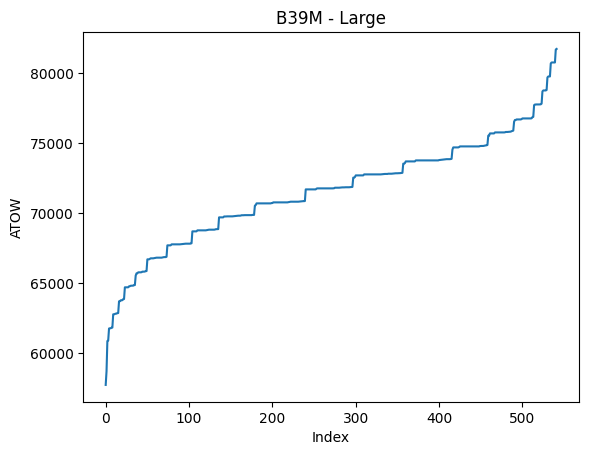

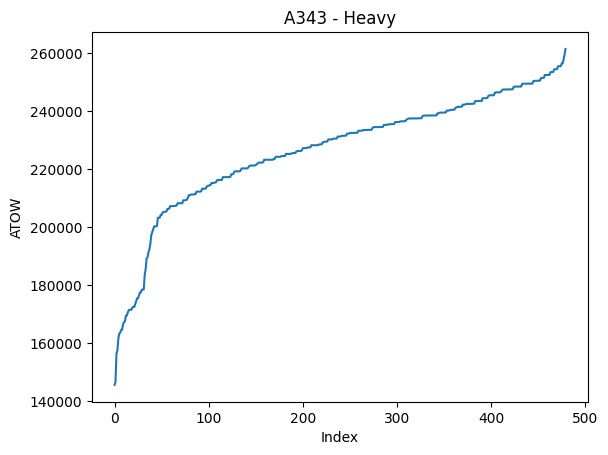

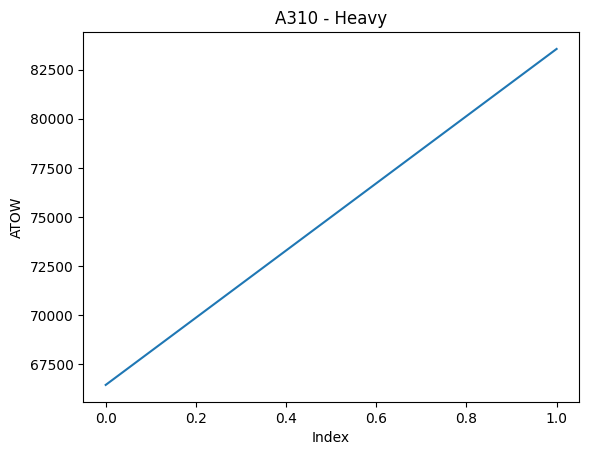

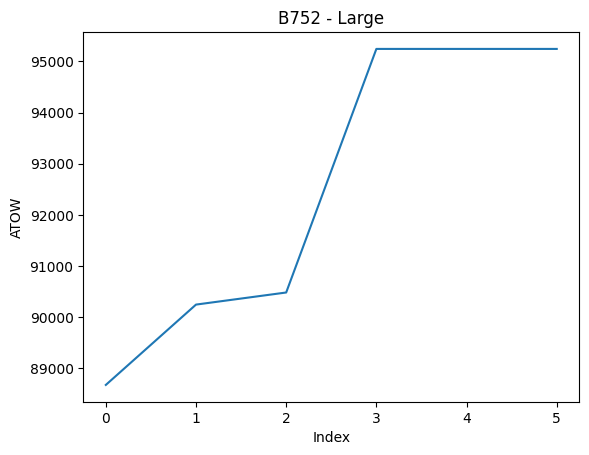

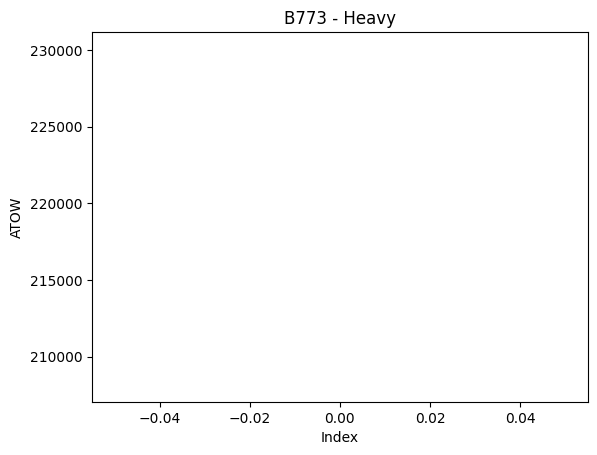

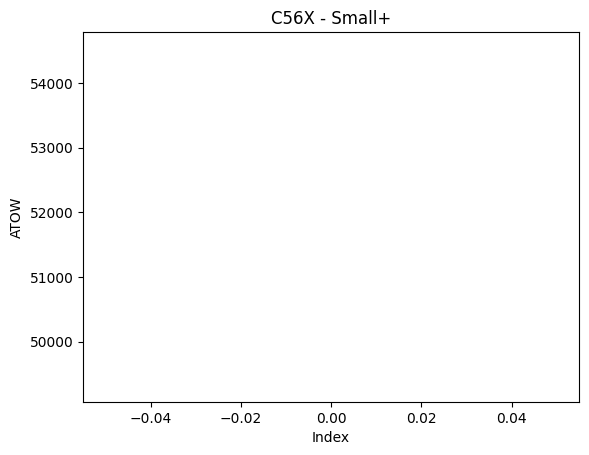

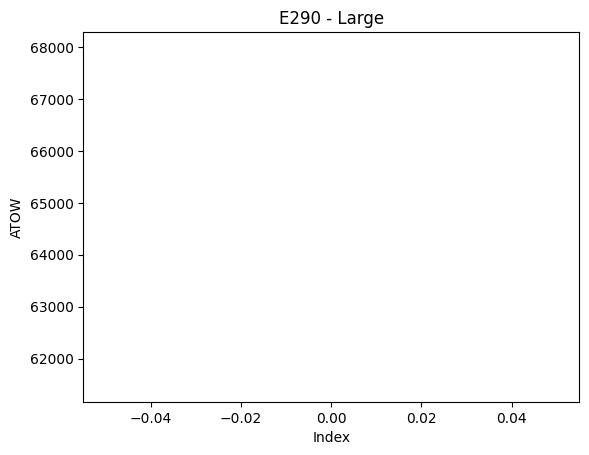

In [6]:
for aircraft_type in aircraft_types:
    flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights.shape)
    sorted_tows = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    plt.figure()
    plt.plot(sorted_tows)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    # print(first_row)

A320 Large (79761, 216)
B772 Heavy (8322, 216)
A333 Heavy (17011, 216)
B788 Heavy (5960, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
B789 Heavy (5734, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
B77W Heavy (9162, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
B763 Heavy (1190, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)
A359 Heavy (1725, 216)
A332 Heavy (2241, 216)
B39M Large (542, 216)
A343 Heavy (480, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_102940\3975091668.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


A310 Heavy (2, 216)
B752 Large (6, 216)
B773 Heavy (1, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


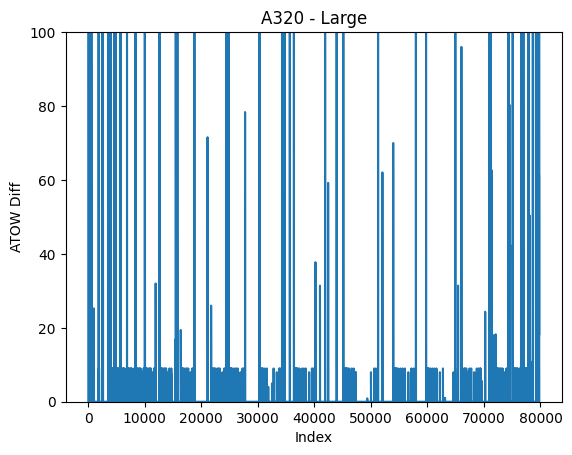

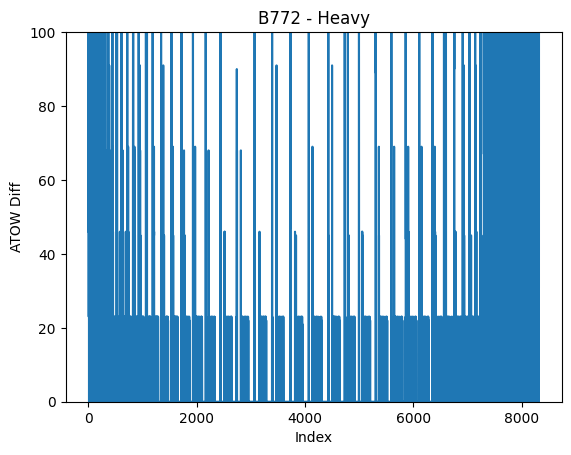

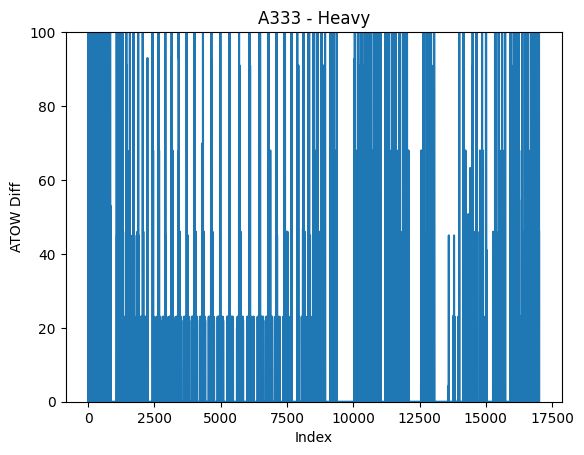

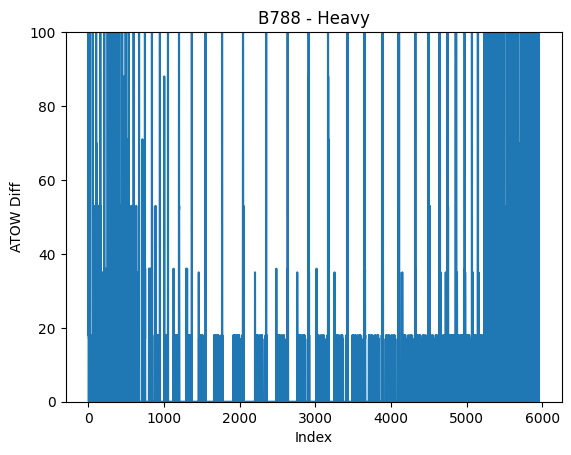

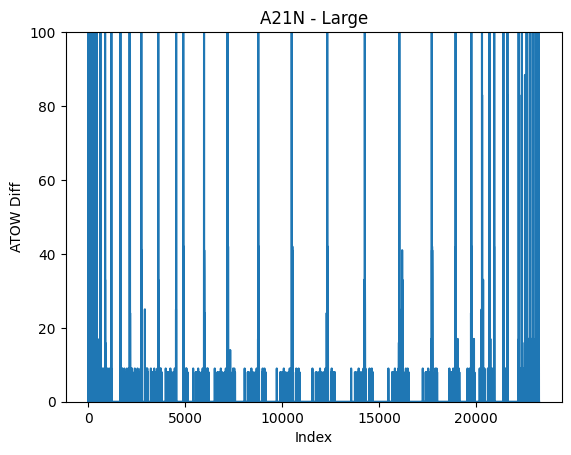

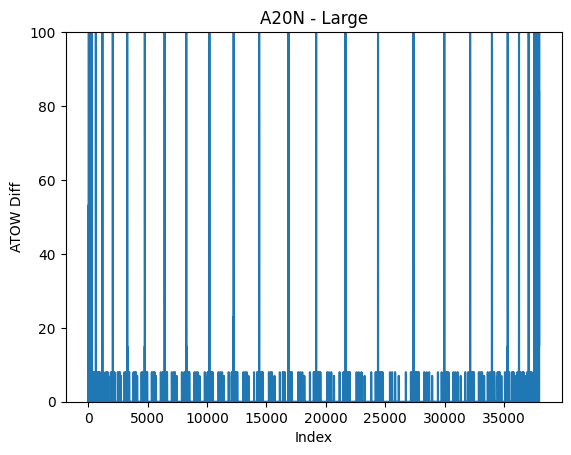

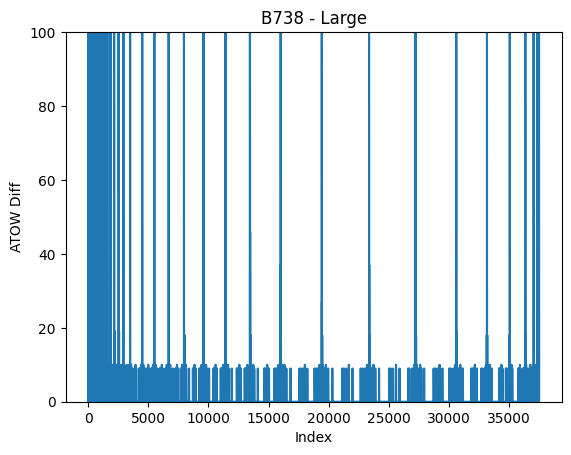

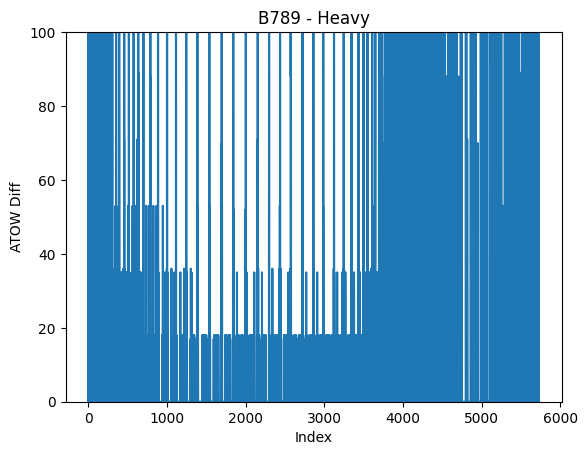

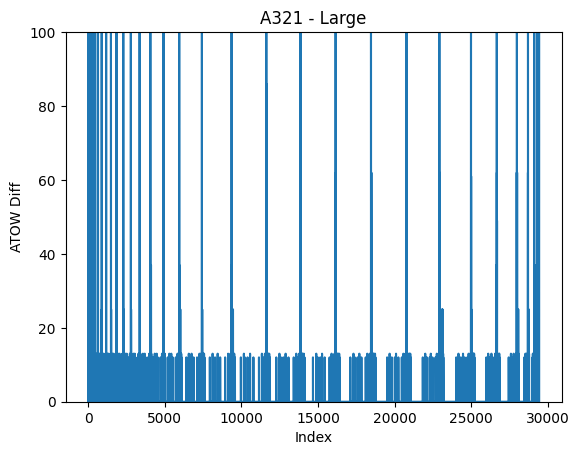

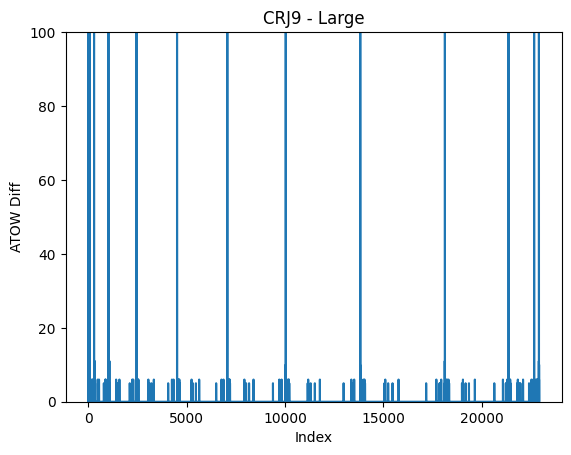

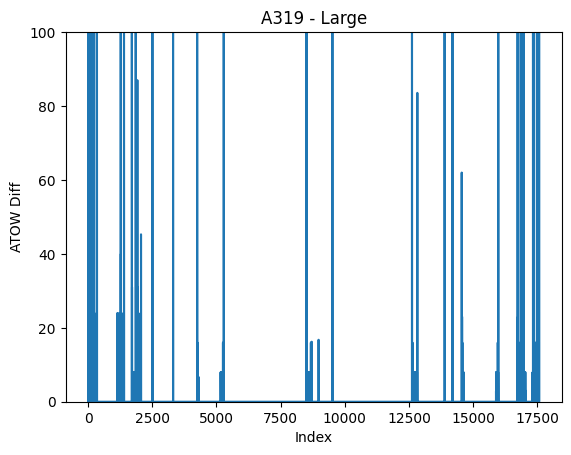

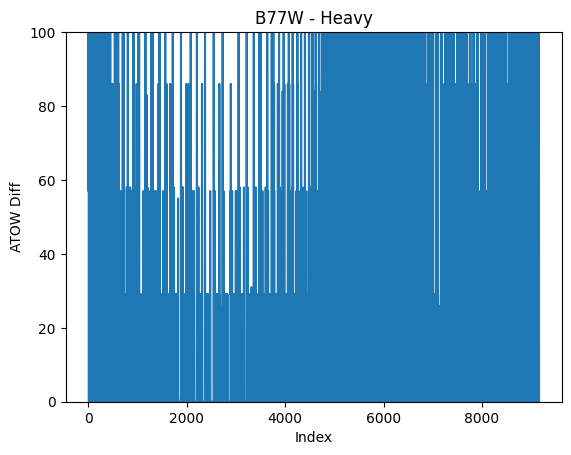

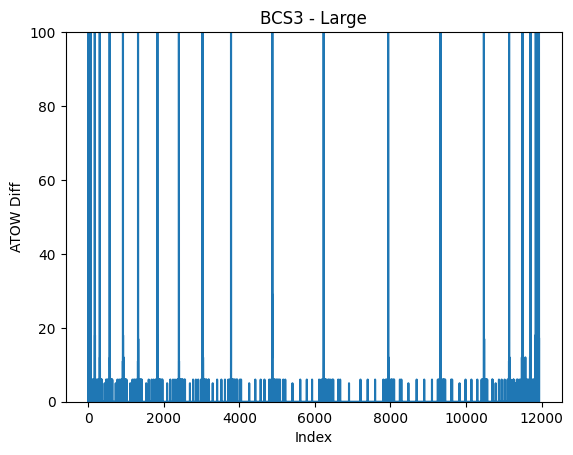

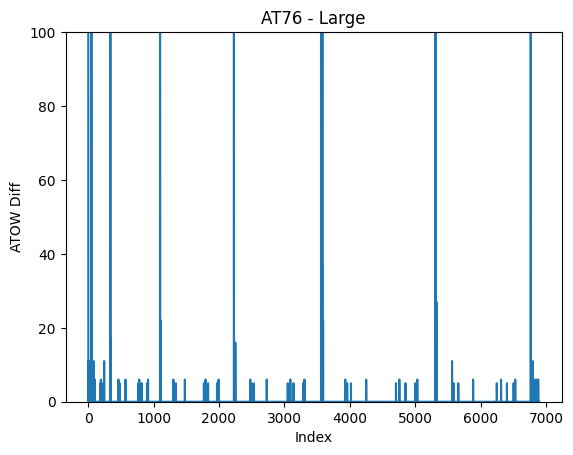

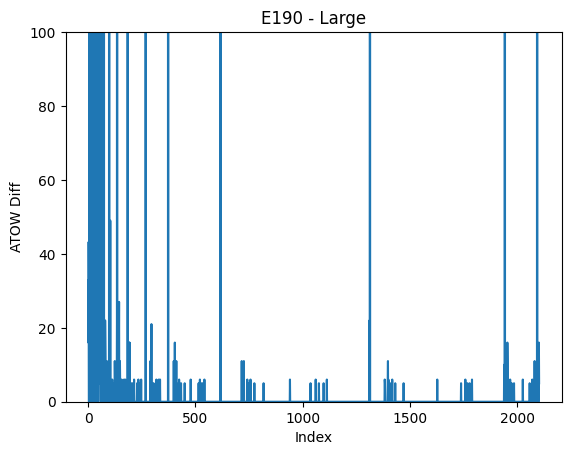

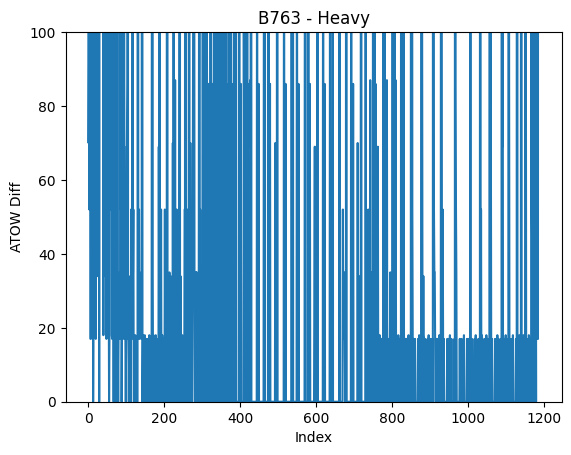

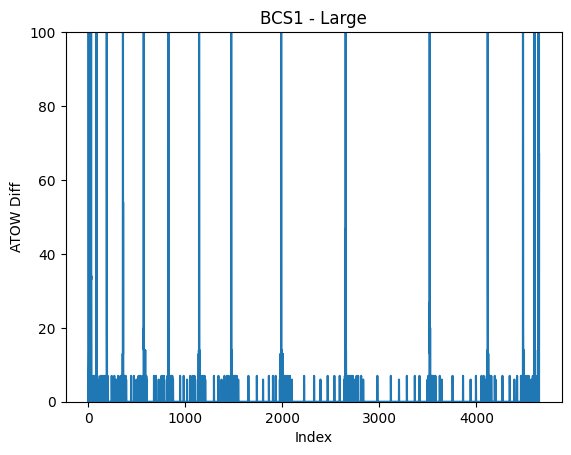

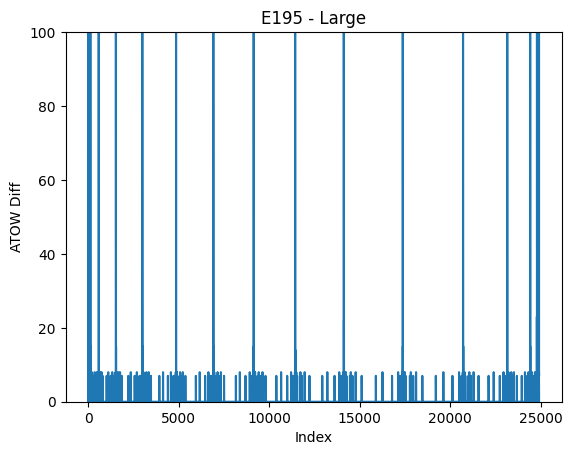

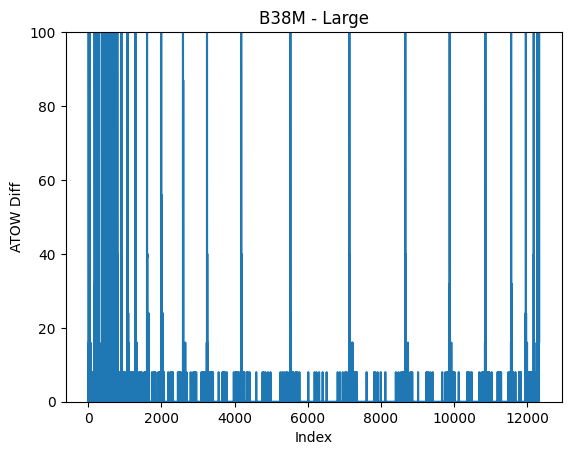

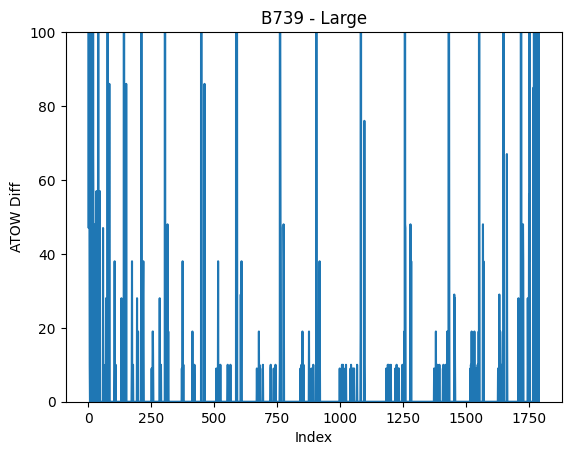

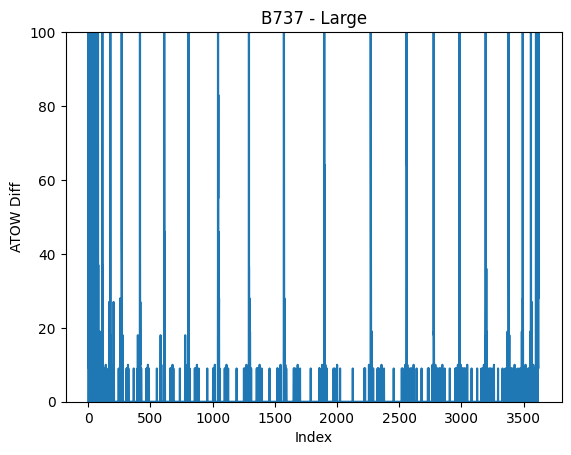

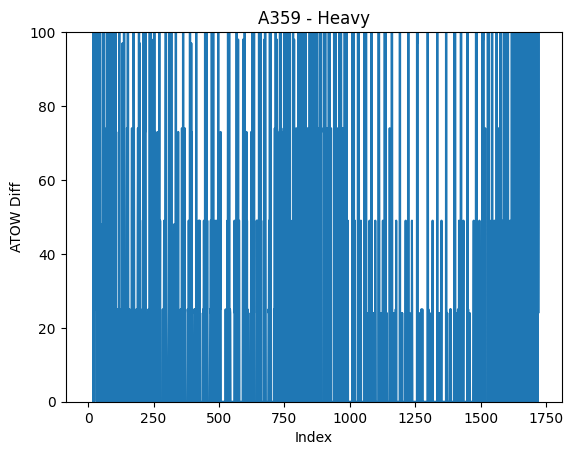

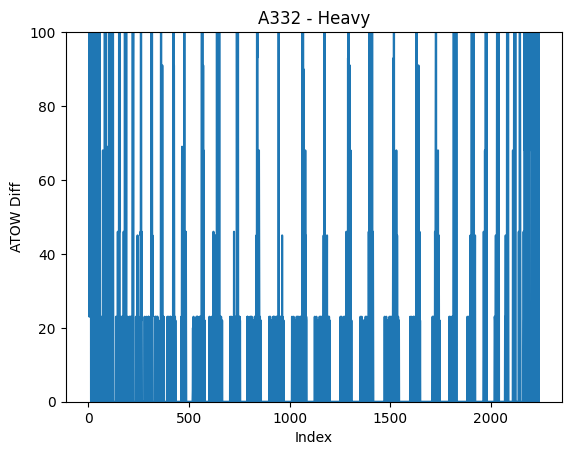

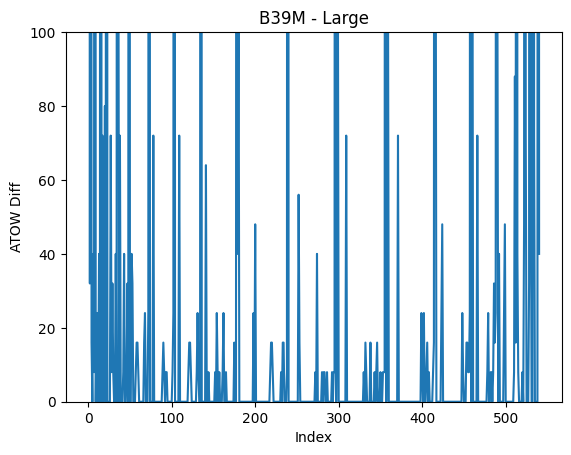

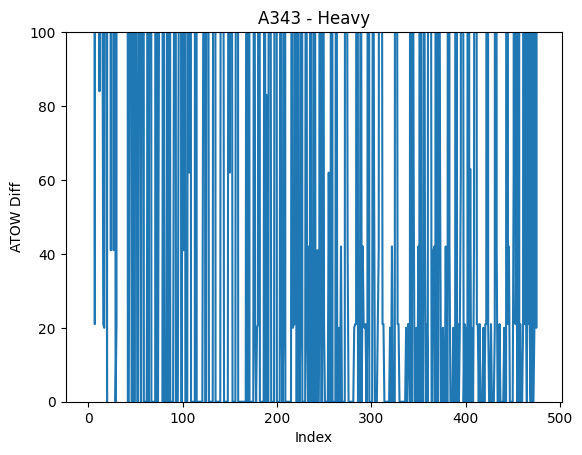

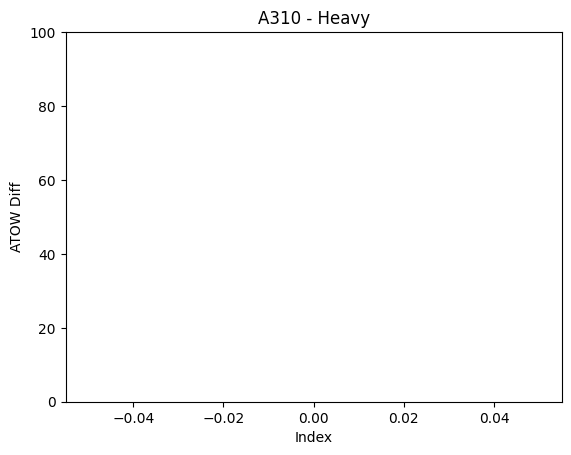

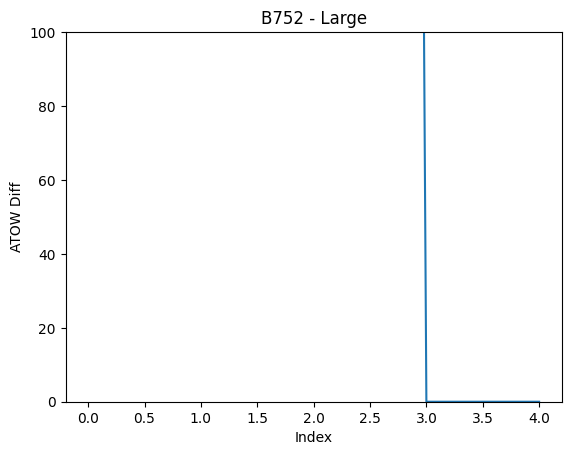

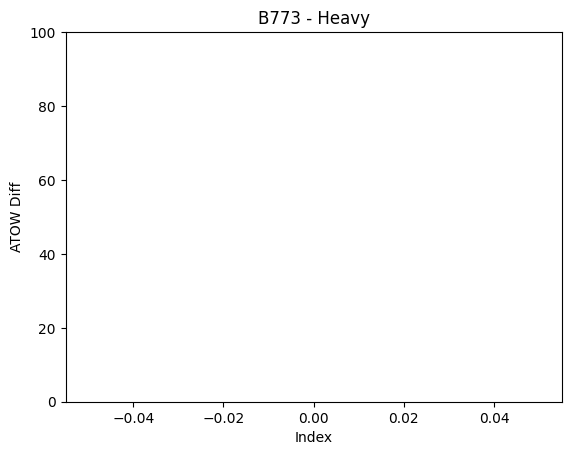

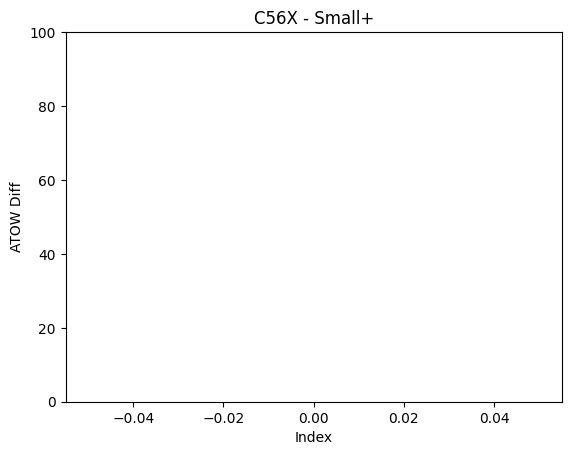

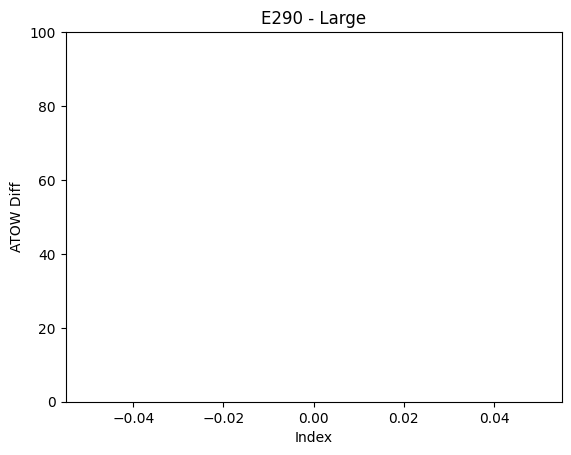

In [7]:
for aircraft_type in aircraft_types:
    flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights.shape)
    sorted_tows = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    # diff = np.diff(sorted_tows)
    diff = np.diff(sorted_tows)
    # counts, bins = np.histogram(diff)
    plt.figure()
    # plt.hist(diff, [100.0, 200.0, 300.0, 400.0, 500.0, np.max(diff)])
    plt.plot(diff)
    plt.ylim([0.0, 100.0])
    plt.xlabel('Index')
    plt.ylabel('ATOW Diff')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    # print(first_row)

A320 Large (79761, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)
B39M Large (542, 216)


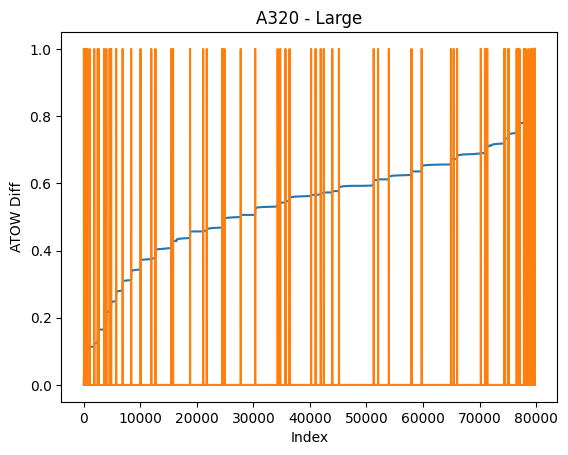

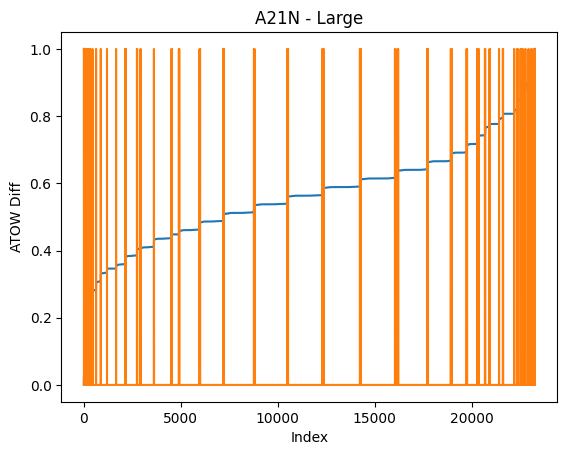

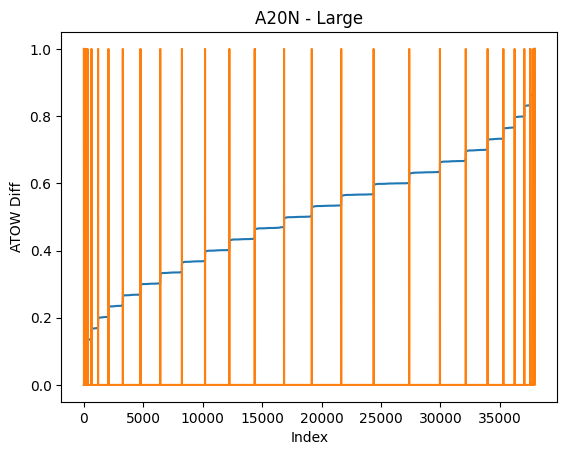

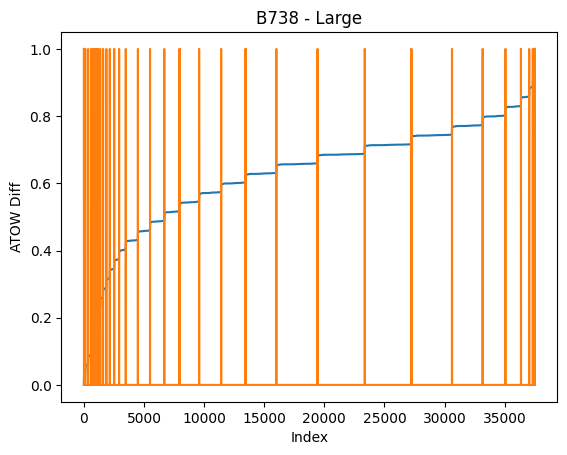

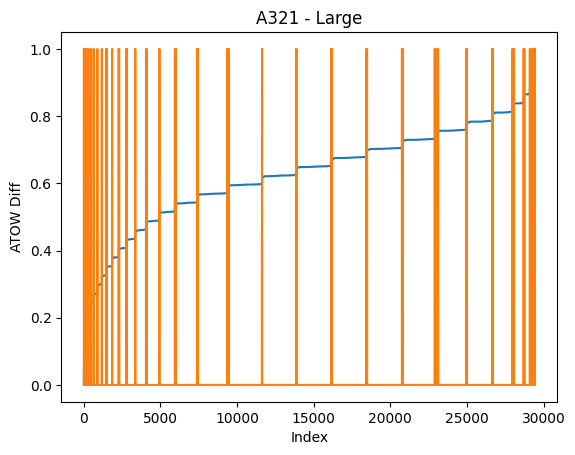

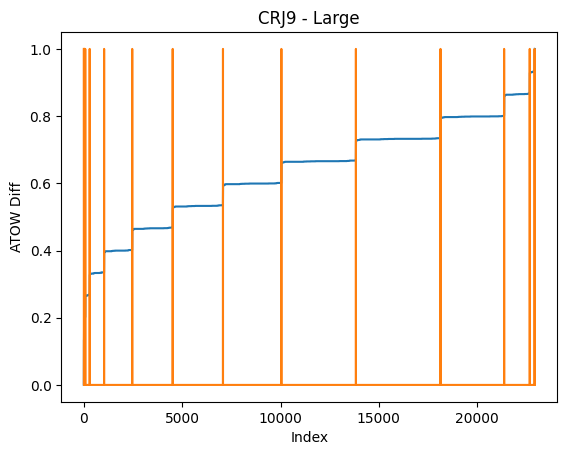

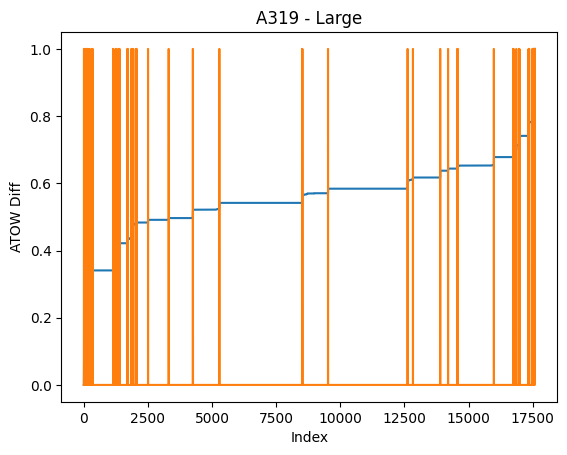

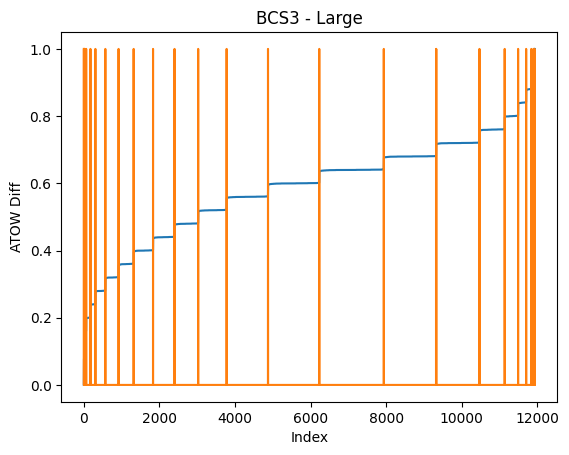

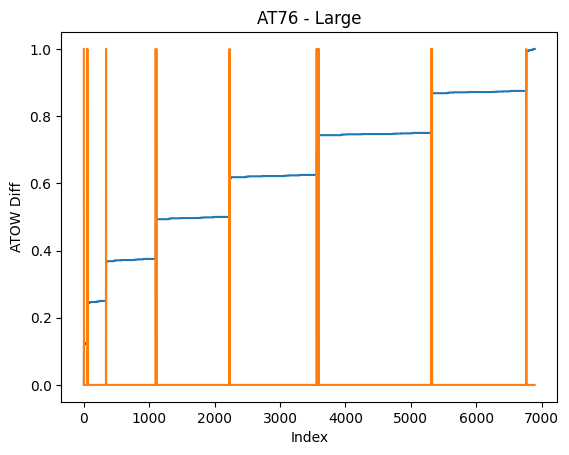

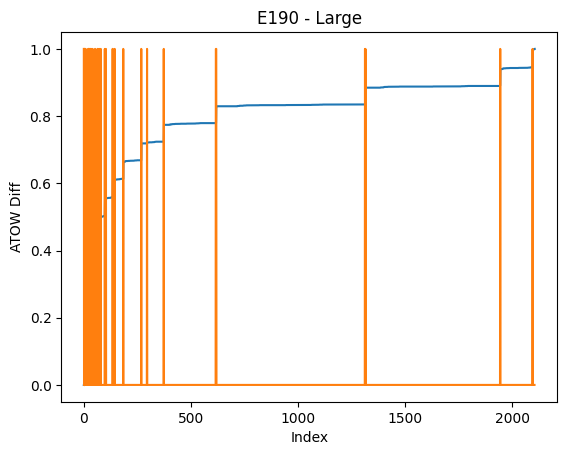

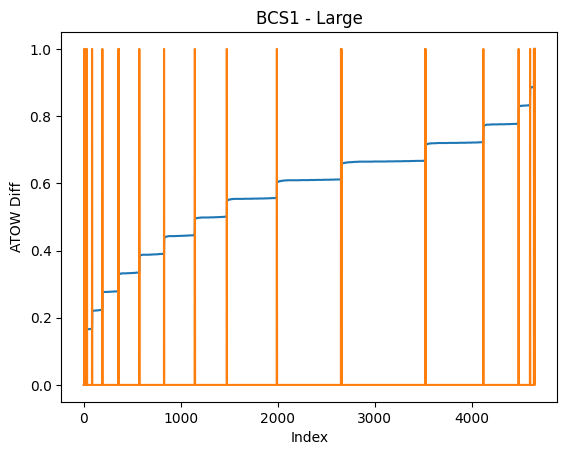

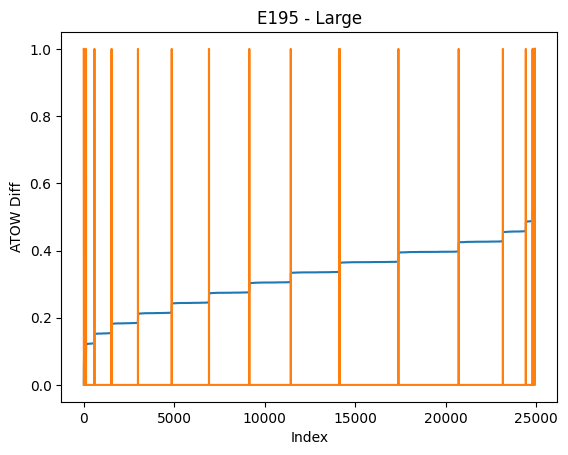

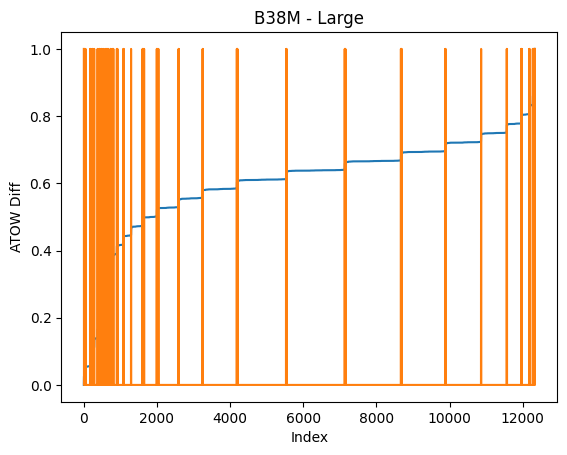

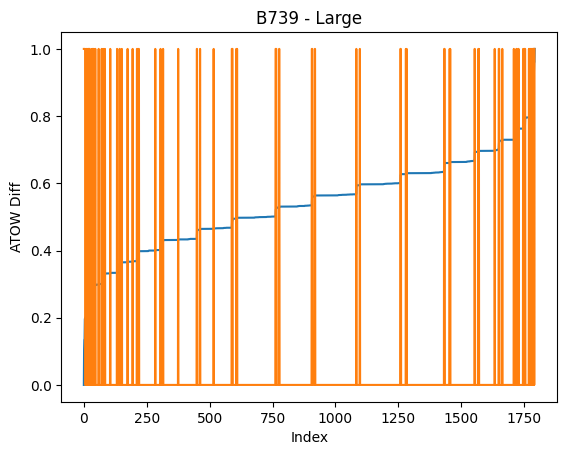

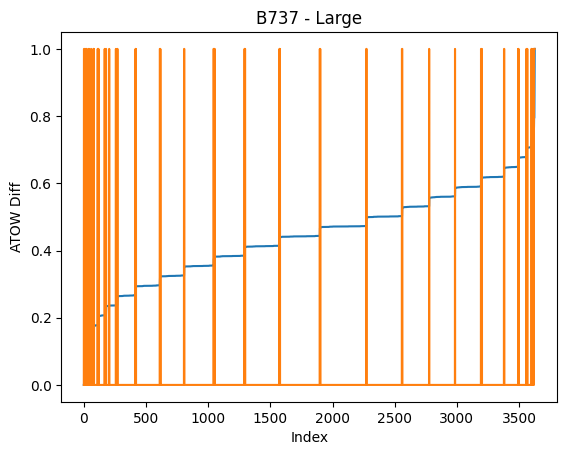

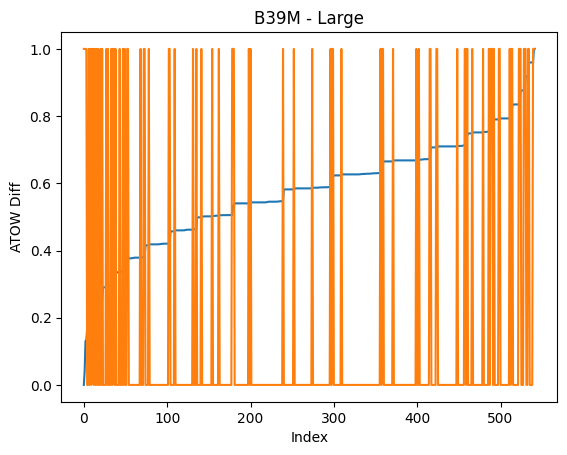

In [8]:
removed = ['A310', 'B752', 'B773', 'C56X', 'E290']

threshold = 20.0

for aircraft_type in aircraft_types:
    if aircraft_type in removed:
        continue
    flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights.iloc[0]
    weight_type = first_row['FAA_Weight']
    if weight_type == 'Heavy':
        continue
    print(aircraft_type, weight_type, flights.shape)
    sorted_tows = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    diff = np.diff(sorted_tows)
    scale = np.max(sorted_tows) - np.min(sorted_tows)
    plt.figure()
    plt.plot((sorted_tows - np.min(sorted_tows)) / scale)
    plt.plot(diff > threshold)
    # plt.ylim([0.0, 100.0])
    plt.xlabel('Index')
    plt.ylabel('ATOW Diff')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    # print(first_row)

A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_102940\2820150060.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


B739 Large (1793, 216)
B737 Large (3627, 216)
B39M Large (542, 216)
B752 Large (6, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_102940\2820150060.py:36: RuntimeWarning: invalid value encountered in divide
  plt.plot((sorted_tows - np.min(sorted_tows)) / scale)


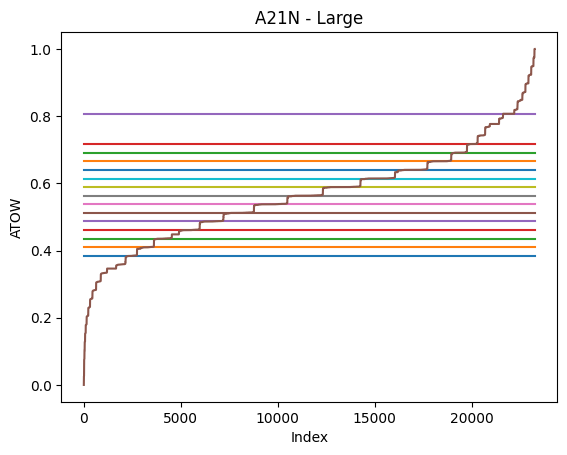

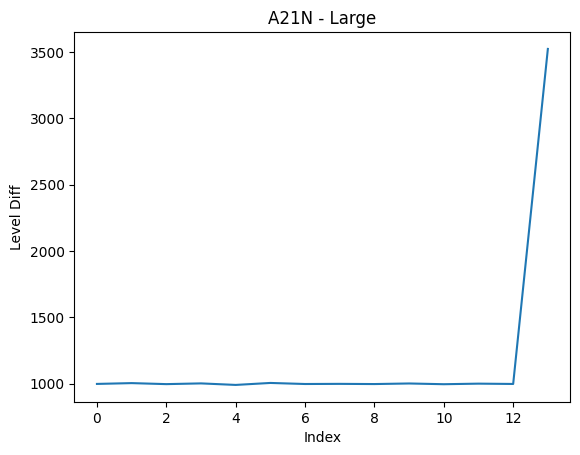

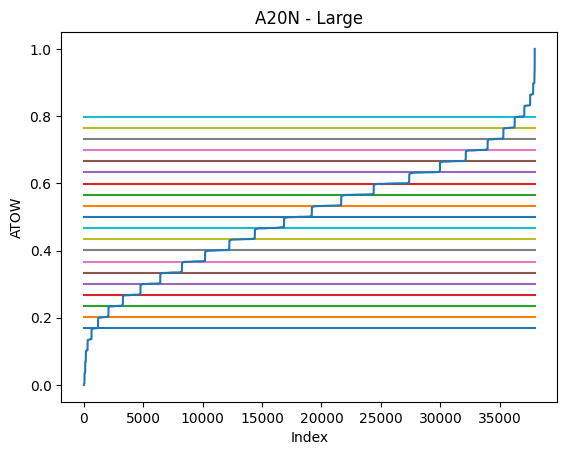

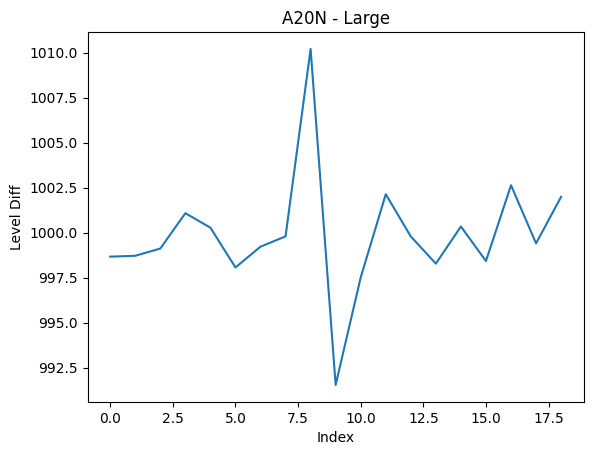

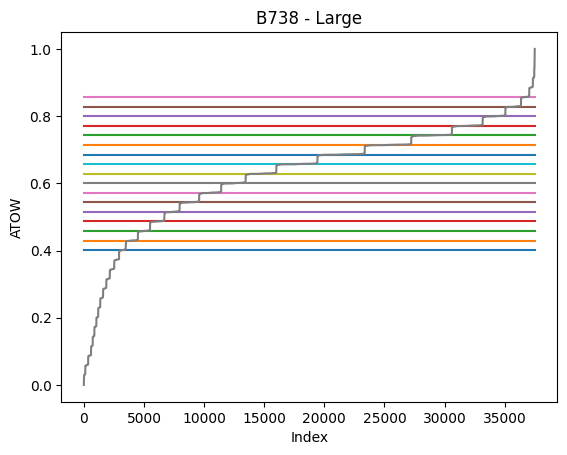

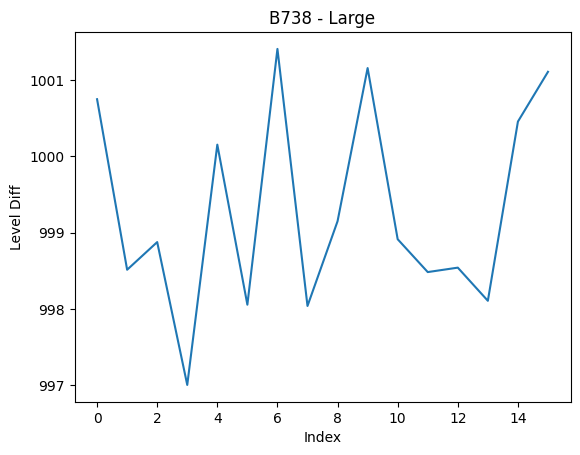

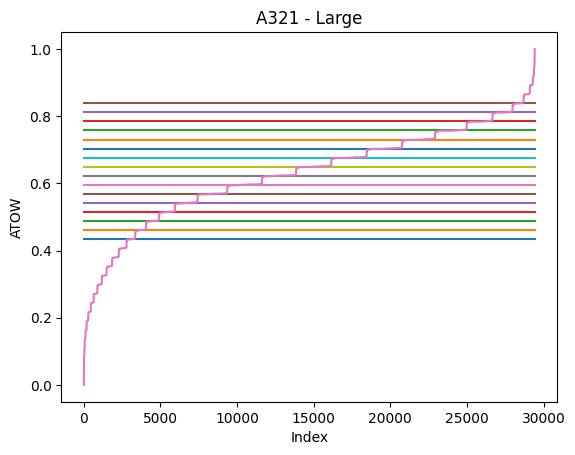

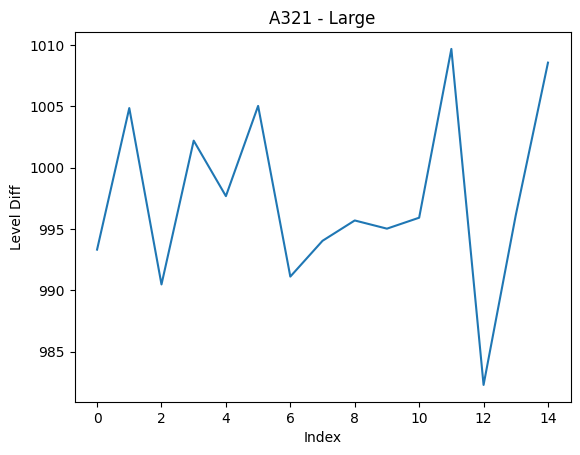

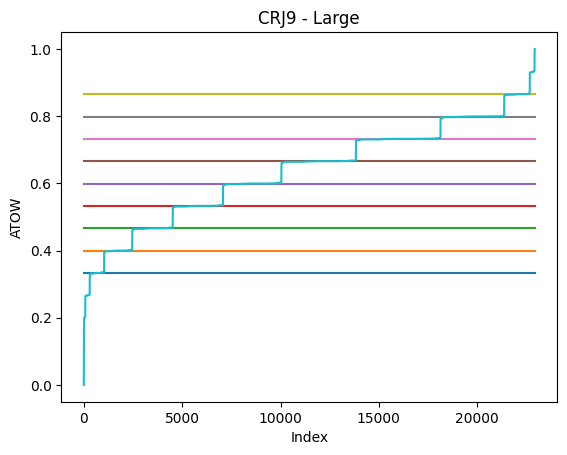

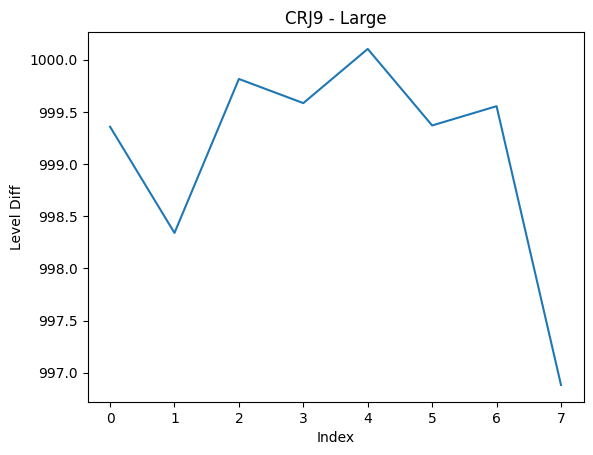

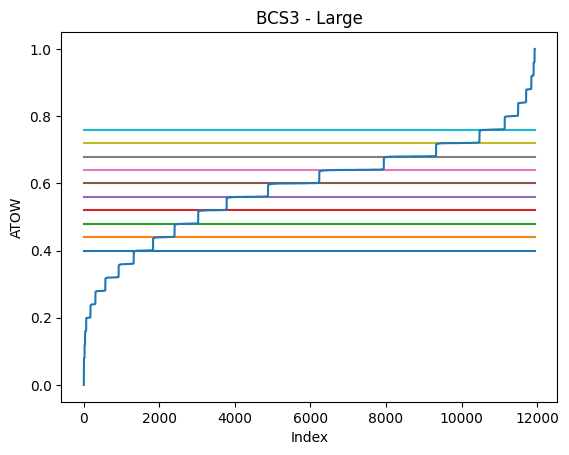

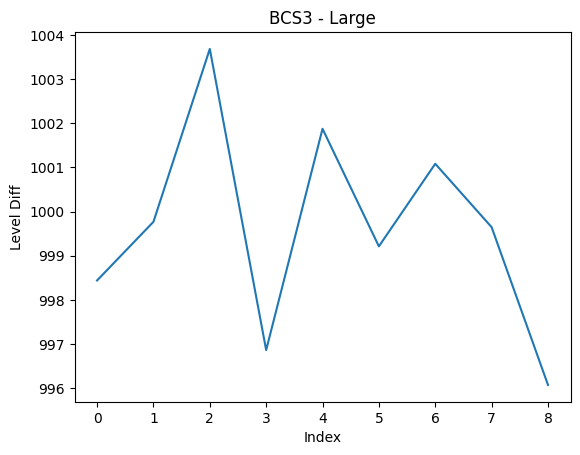

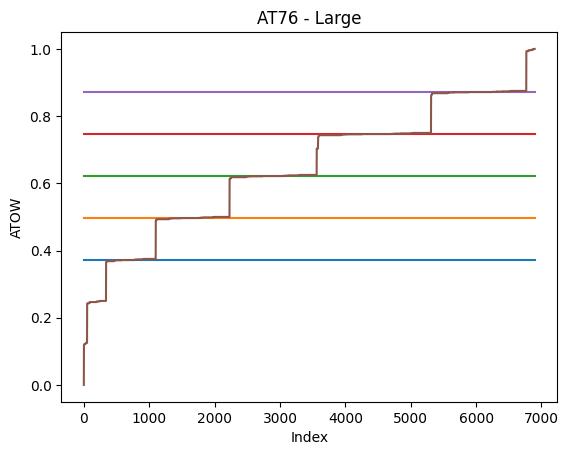

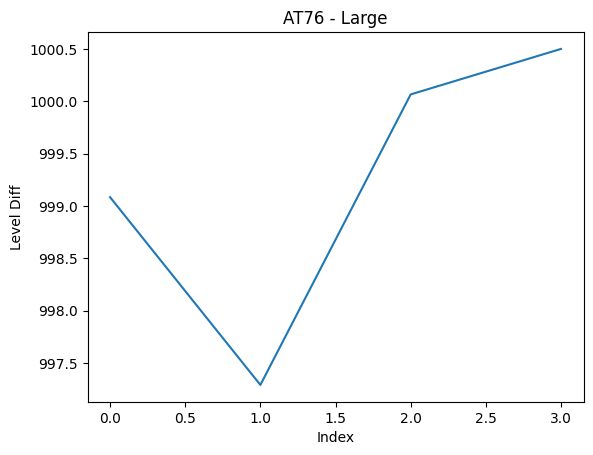

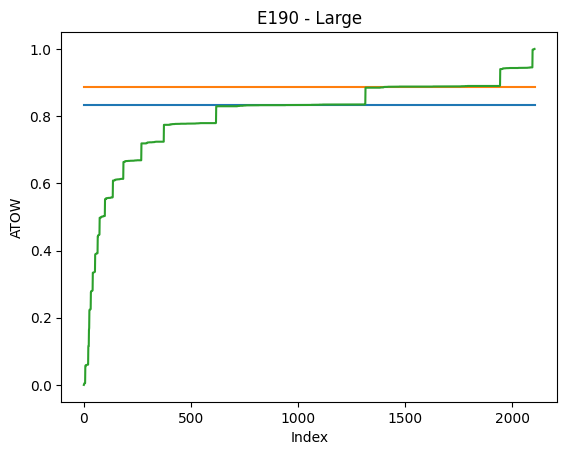

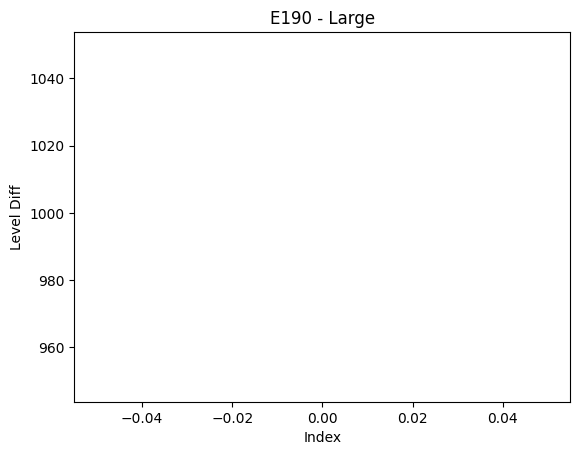

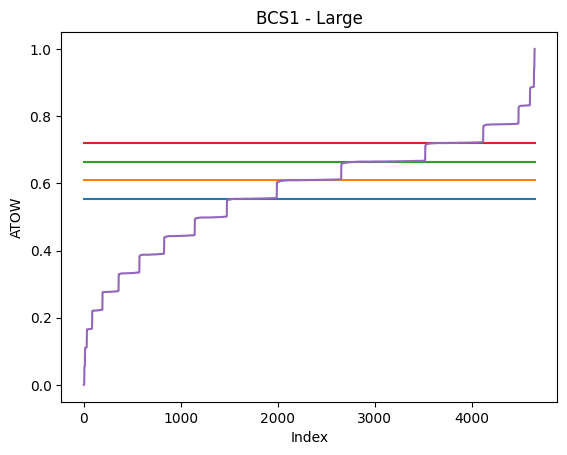

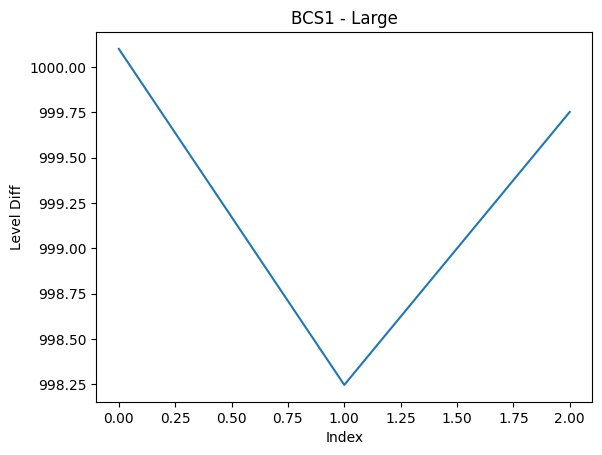

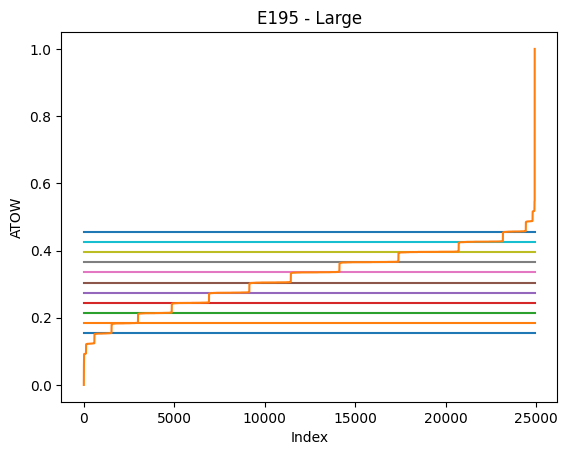

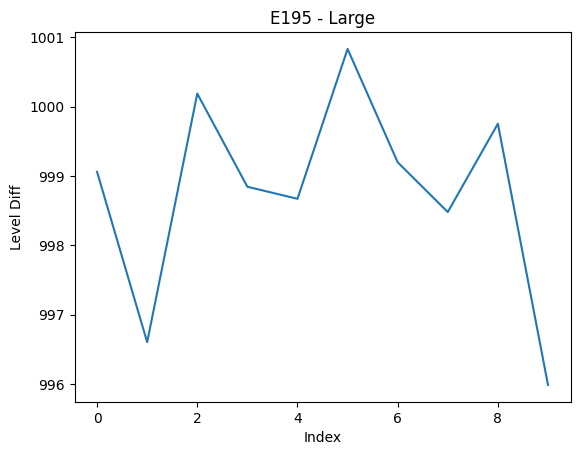

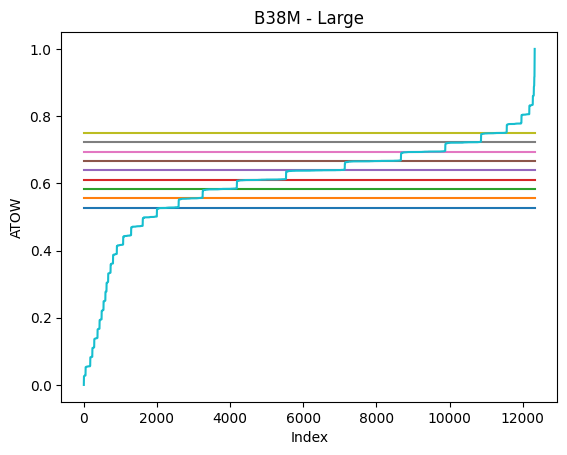

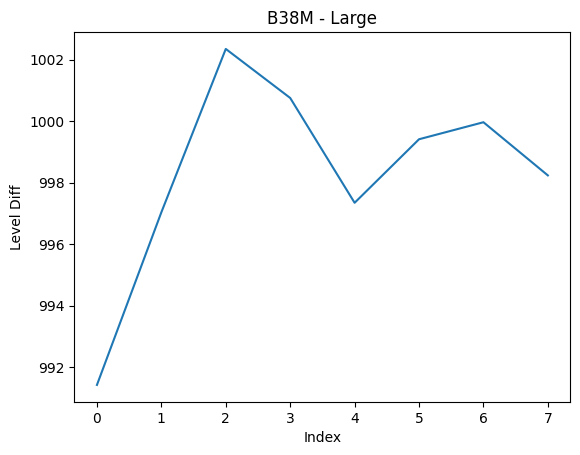

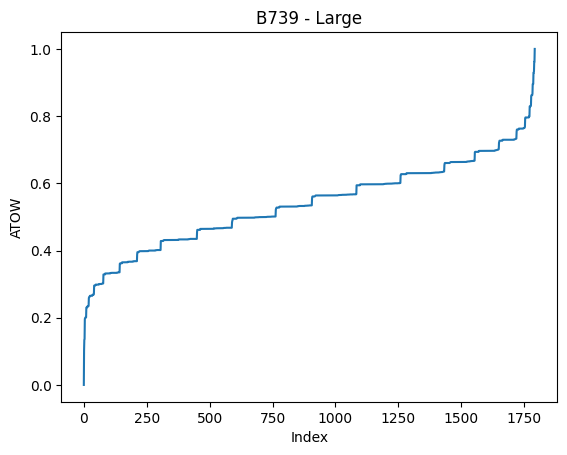

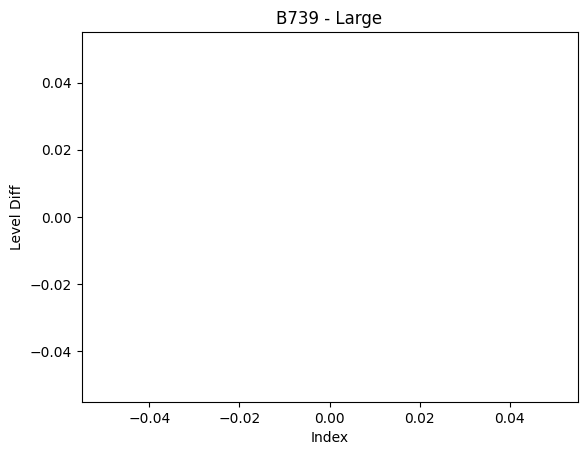

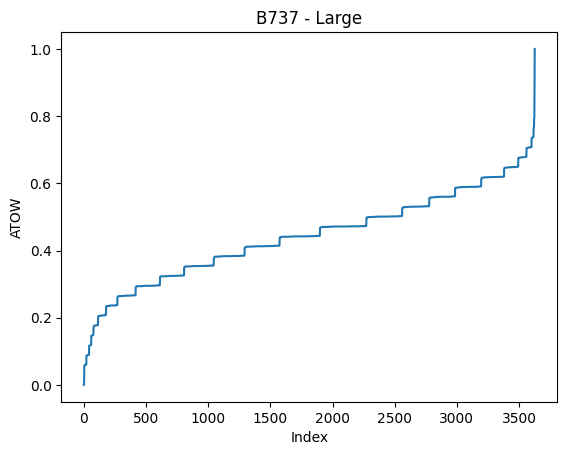

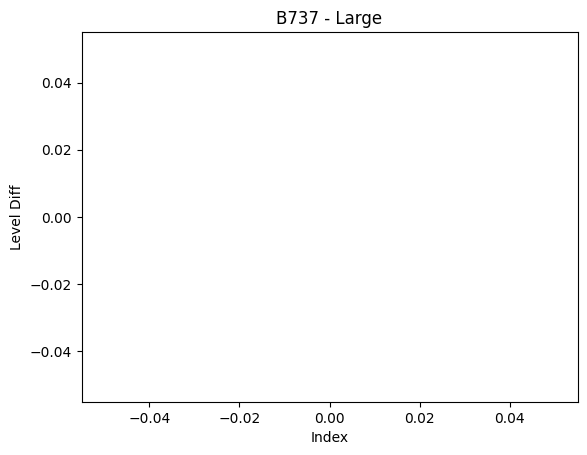

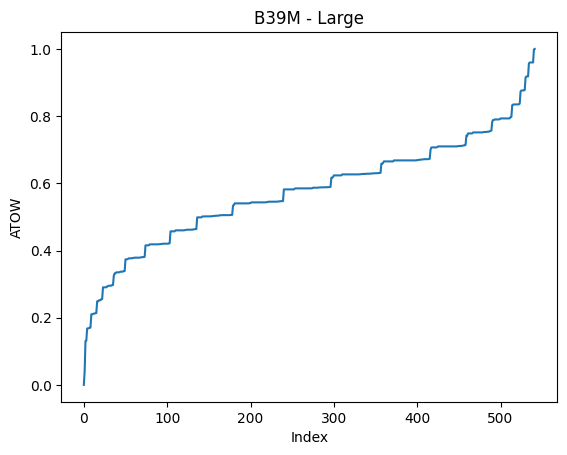

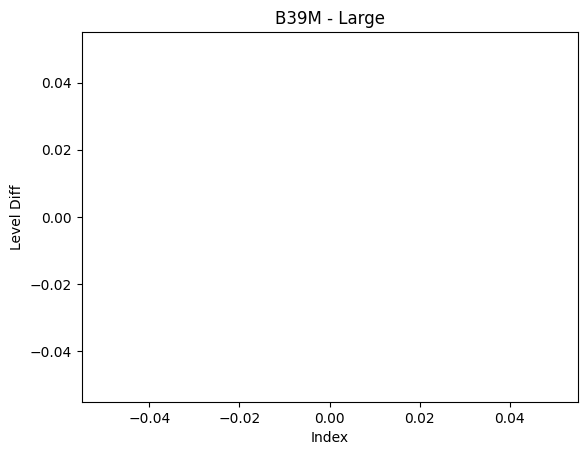

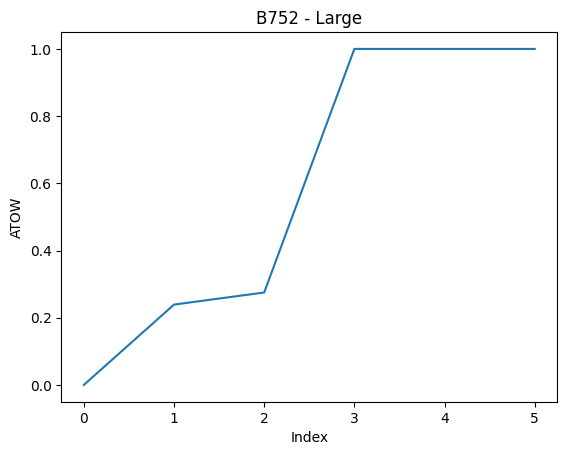

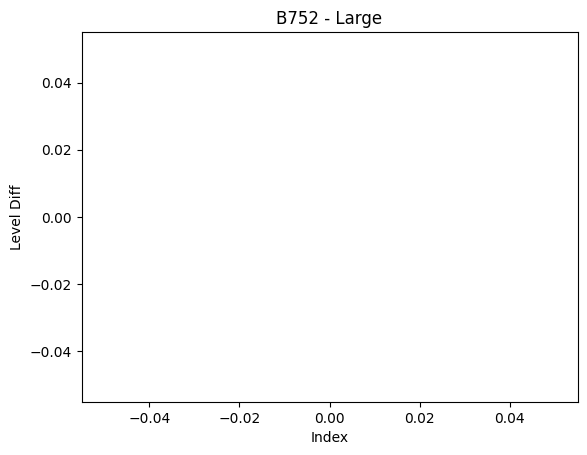

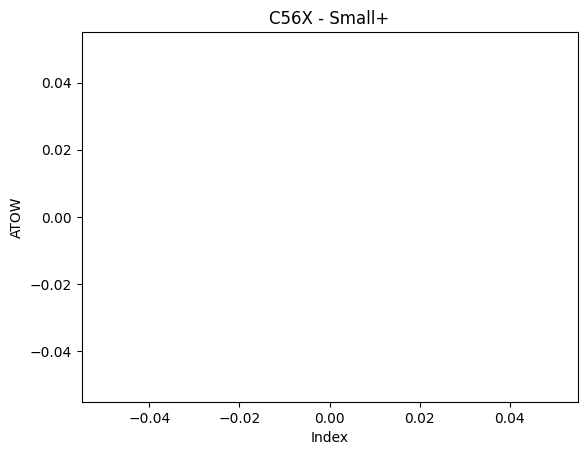

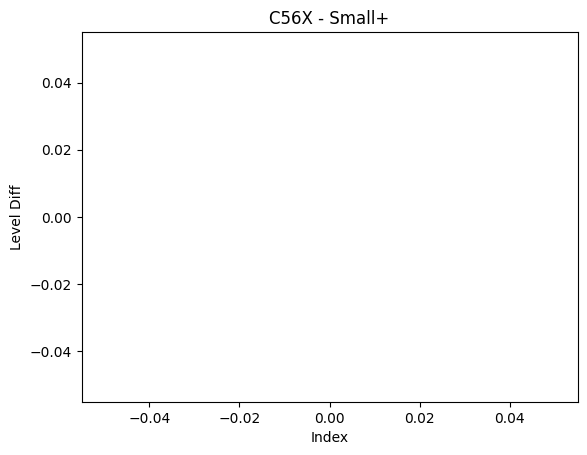

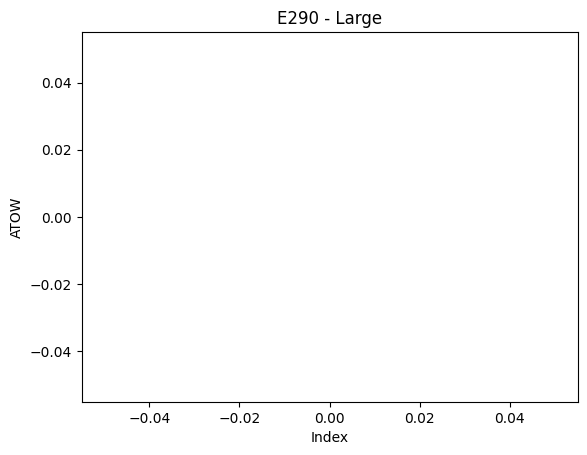

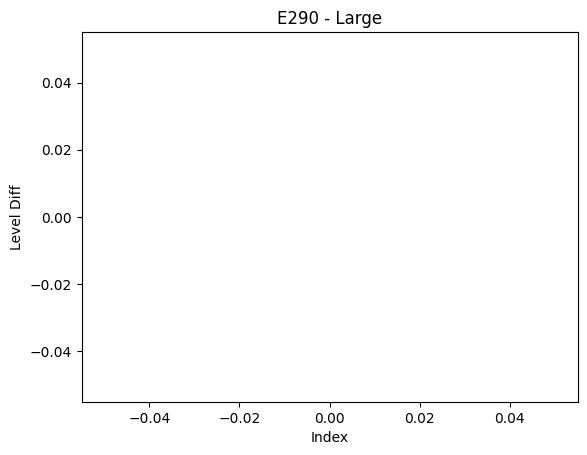

In [92]:
removed = ['A310', 'B752', 'B773', 'C56X', 'E290']
removed = [removed, 'A319', 'A320']

threshold = 20.0
min_window_size = 500

levels_dict = dict()

for aircraft_type in aircraft_types:
    if aircraft_type in removed:
        continue
    flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights.iloc[0]
    weight_type = first_row['FAA_Weight']
    if weight_type == 'Heavy':
        continue
    print(aircraft_type, weight_type, flights.shape)
    sorted_tows = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    diff = np.diff(sorted_tows)
    transitions = np.squeeze(np.argwhere(diff > 20.0))
    levels = []
    scale = np.max(sorted_tows) - np.min(sorted_tows)
    for i in range(transitions.size):
        if i + 1 > transitions.size - 1:
            break
        t1 = transitions[i]
        t2 = transitions[i + 1]
        window_size = t2 - t1
        if window_size < min_window_size:
            continue
        levels.append(np.mean(sorted_tows[t1:t2]))
    plt.figure()
    for level in levels:
        l = (level - sorted_tows[0]) / scale
        plt.plot(np.array([0, sorted_tows.size]), np.array([l, l]))
    plt.plot((sorted_tows - np.min(sorted_tows)) / scale)
    # plt.plot(diff > threshold)
    # plt.ylim([0.0, 100.0])
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    plt.figure()
    plt.plot(np.diff(np.array(levels)))
    plt.xlabel('Index')
    plt.ylabel('Level Diff')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    if levels:
        levels_dict[aircraft_type] = np.array(levels)
    # print(first_row)

In [93]:
challenge_set_updated = pd.read_csv("./data/challenge_set_updated_v18.csv")
submission_set = pd.read_csv("./data/final_submission_set.csv")
submission_set_updated = pd.read_csv("./data/submission_set_updated_v18.csv")

df = challenge_set_updated.iloc[:,:]

X = df.drop('tow', axis=1)
y = df['tow']

df.head()

print(levels_dict)

{'A21N': array([71792.5492228 , 72790.36826783, 73794.23956044, 74790.4957102 ,
       75792.23885618, 76782.48643953, 77787.62014134, 78784.79060555,
       79783.02485188, 80779.79478458, 81780.95159151, 82776.5154139 ,
       83776.39046392, 84773.88996139, 88298.71933938]), 'A20N': array([51835.82181818, 52834.49195402, 53833.21122112, 54832.33333333,
       55833.41782059, 56833.69923161, 57831.77176713, 58830.99705305,
       59830.79411765, 60841.00134663, 61832.54931389, 62830.06561361,
       63832.2033712 , 64831.99598259, 65830.28017602, 66830.62517289,
       67829.05128205, 68831.6884003 , 69831.09799789, 70833.09124538]), 'B738': array([57796.03125   , 58796.77866401, 59795.29183267, 60794.16737468,
       61791.17155865, 62791.32343847, 63789.37883772, 64790.78514851,
       65788.82373817, 66787.97271927, 67789.1284146 , 68788.04152608,
       69786.52414815, 70785.06485849, 71783.17126193, 72783.62567672,
       73784.73206442]), 'A321': array([67735.79136691, 68729.10

In [94]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.metrics import root_mean_squared_error

y_pred = pd.read_csv("catboost_val_v96.csv")

print(root_mean_squared_error(y_val, y_pred))

2349.909814004685


In [110]:
threshold_to_quantize = 10.0

y_pred = pd.read_csv("catboost_val_v96.csv")
y_quant = y_pred.copy()

def quantize_tow(levels, tow):
    imin = np.argmin(np.abs(levels - tow))
    diff = np.abs(levels[imin] - tow)
    if diff < threshold_to_quantize:
        return levels[imin]
    return tow
    
for i in tqdm(range(y_pred.size)):
    aircraft_type = X_val.iloc[i]['aircraft_type']
    tow = y_pred.iloc[i].to_numpy().item()
    if aircraft_type in levels_dict:
        quantized = quantize_tow(levels_dict[aircraft_type], tow)
        y_quant.loc[i, 'tow'] = quantized

100%|██████████████████████████████████████████████████████████████████████████| 73803/73803 [00:10<00:00, 7200.98it/s]


In [109]:
print(root_mean_squared_error(y_val, y_pred))
print(root_mean_squared_error(y_val, y_quant))

2349.909814004685
2349.9118160938183


A320 Large (79761, 216)
B772 Heavy (8322, 216)
A333 Heavy (17011, 216)
B788 Heavy (5960, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
B789 Heavy (5734, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
B77W Heavy (9162, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
B763 Heavy (1190, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_102940\372954751.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


A359 Heavy (1725, 216)
A332 Heavy (2241, 216)
B39M Large (542, 216)
A343 Heavy (480, 216)
A310 Heavy (2, 216)
B752 Large (6, 216)
B773 Heavy (1, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


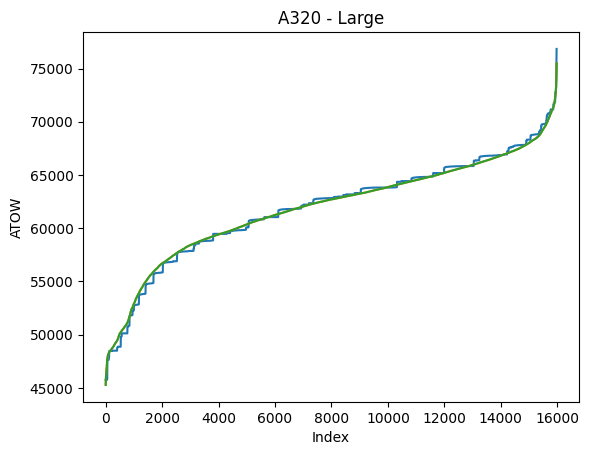

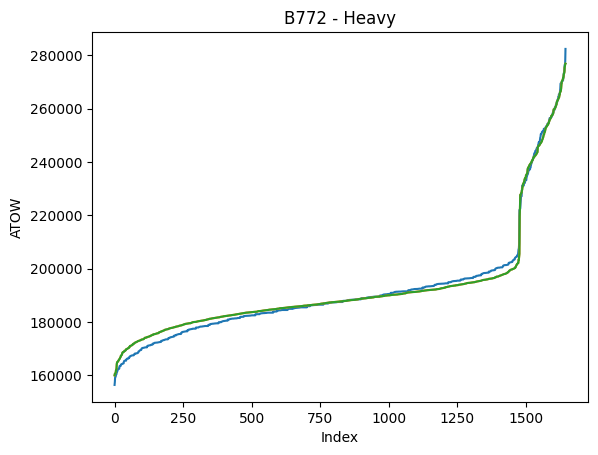

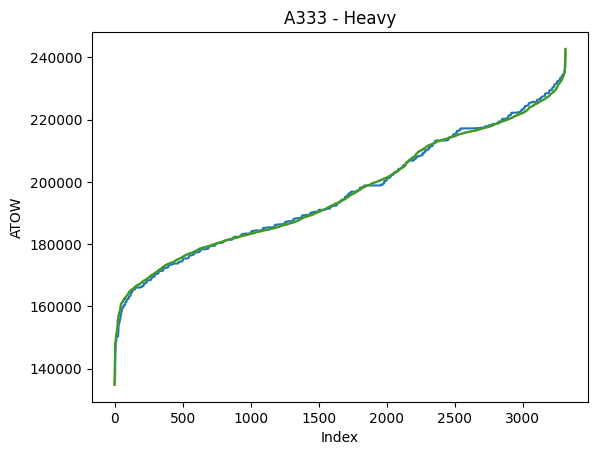

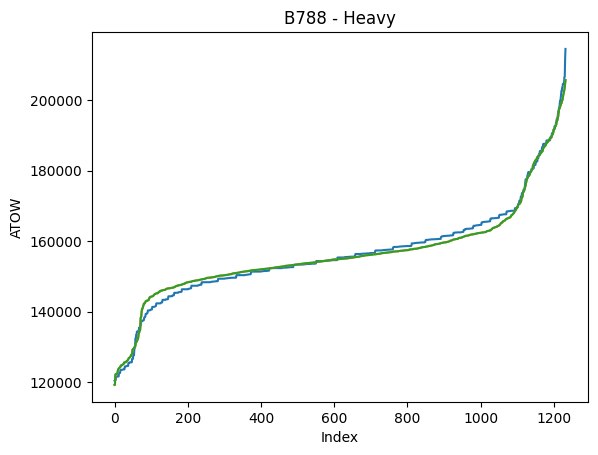

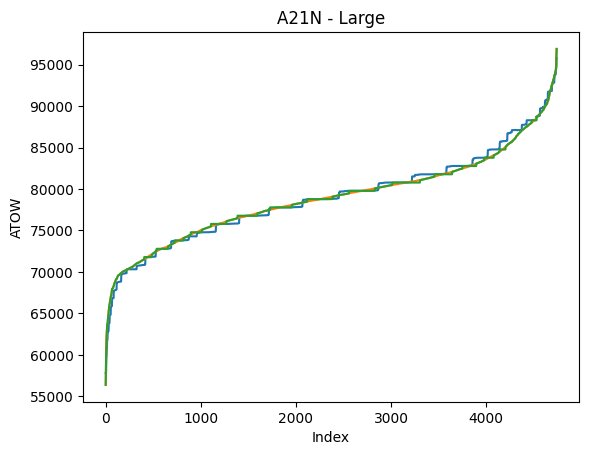

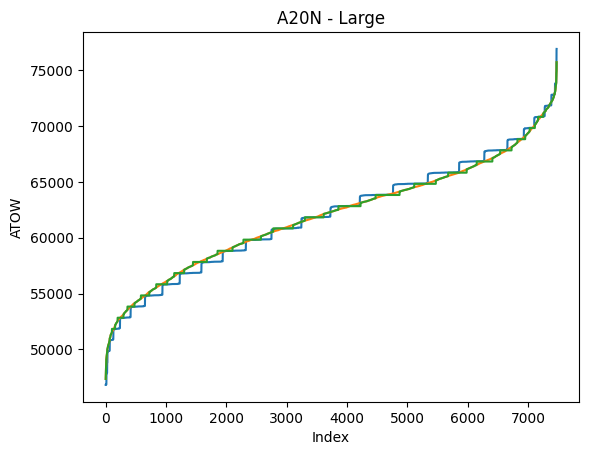

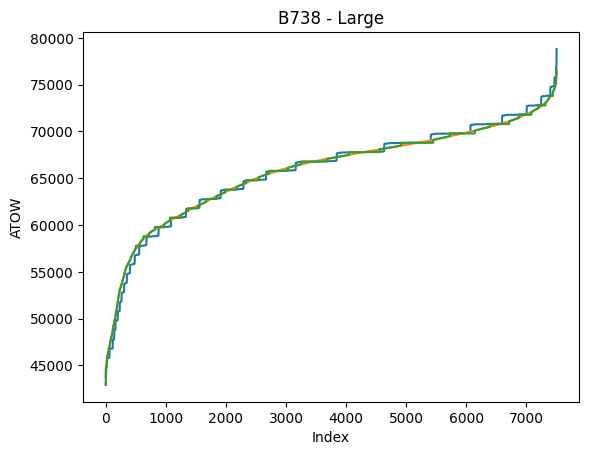

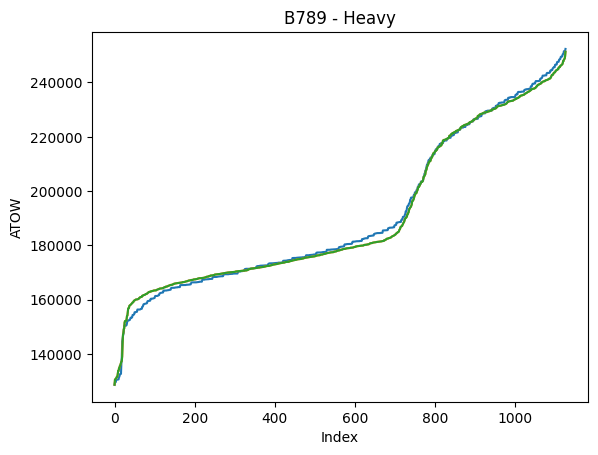

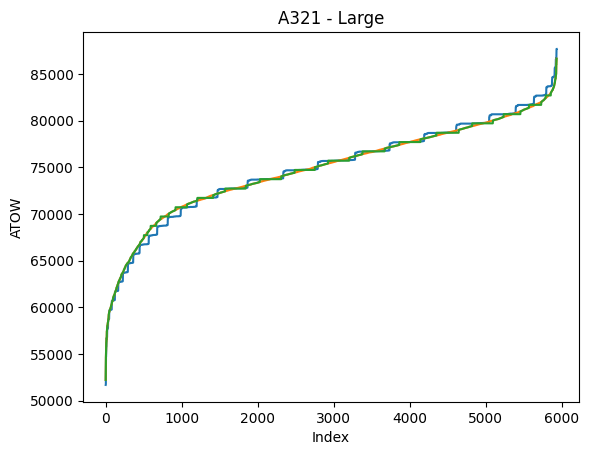

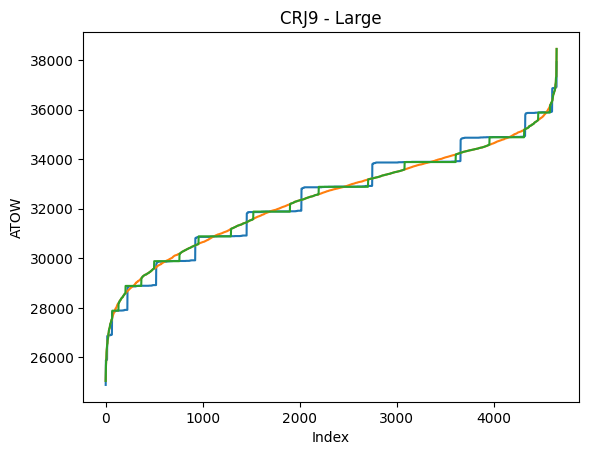

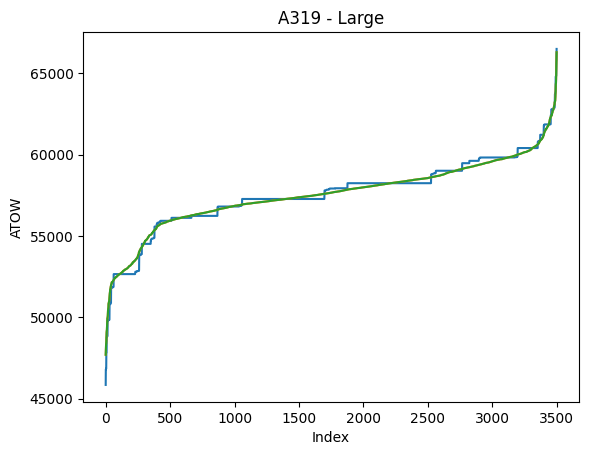

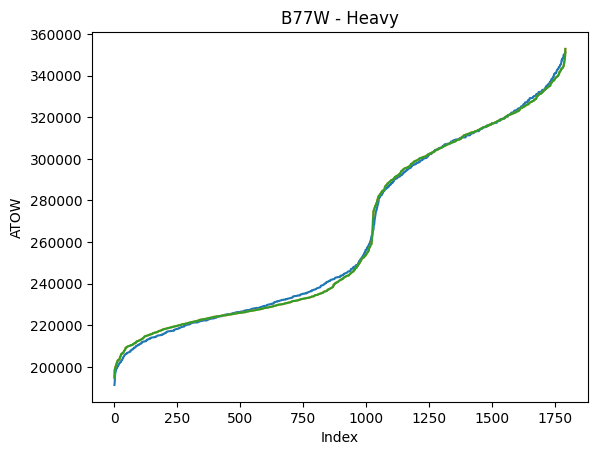

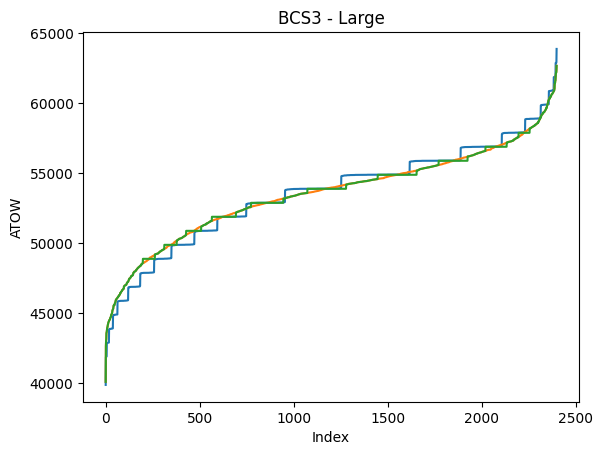

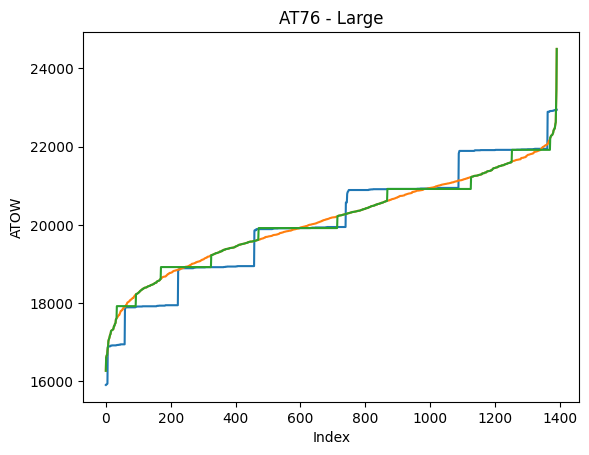

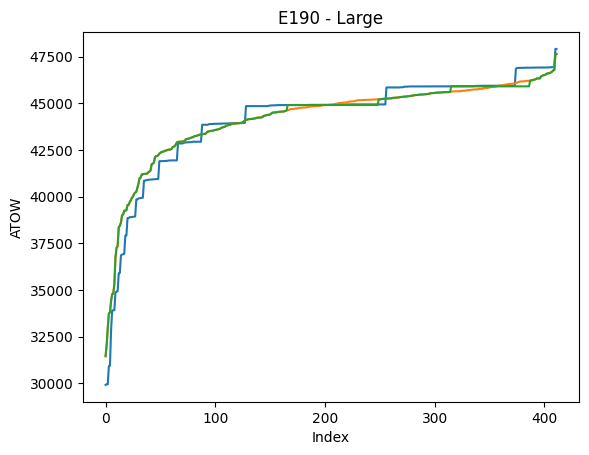

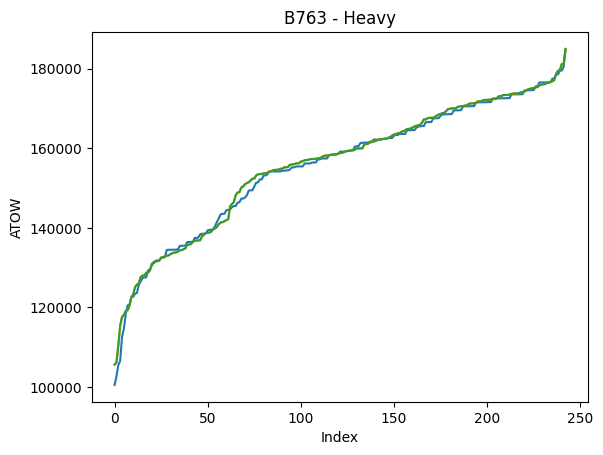

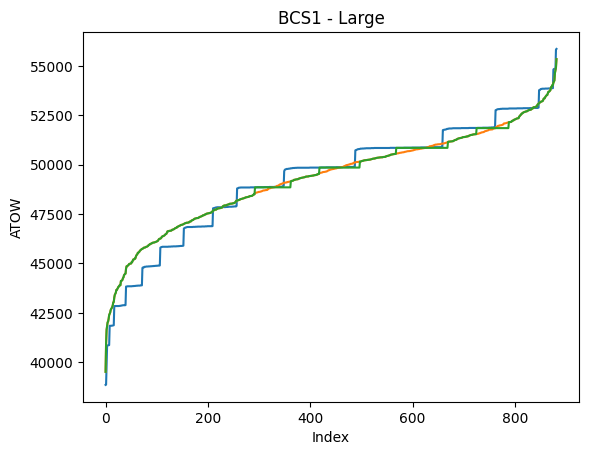

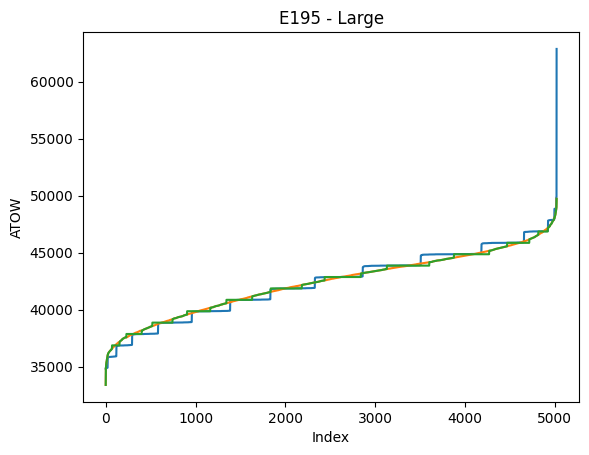

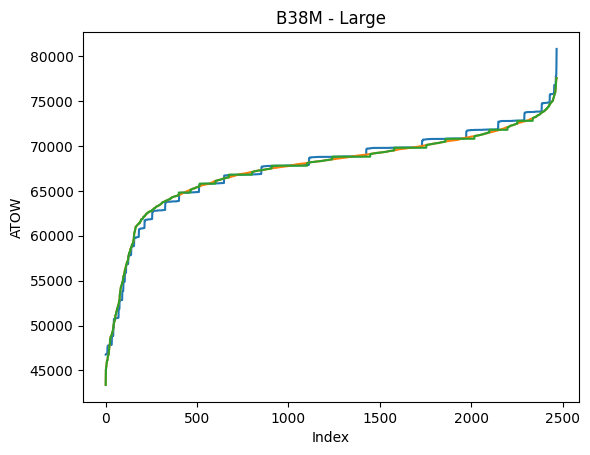

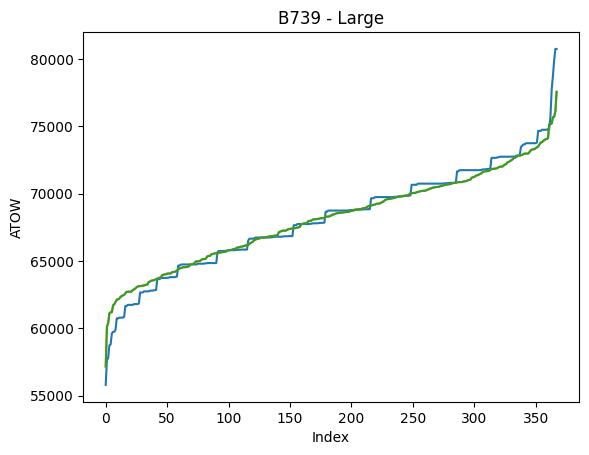

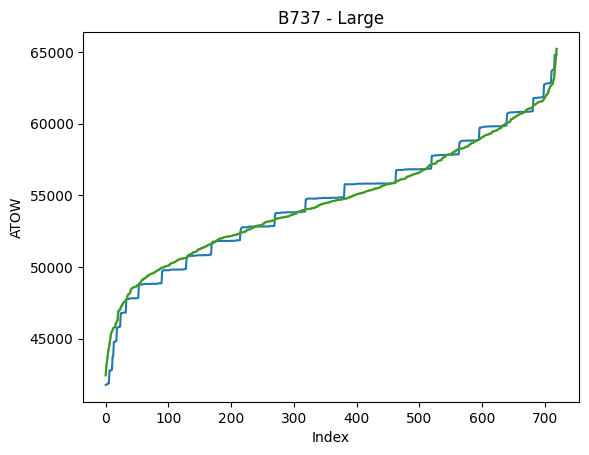

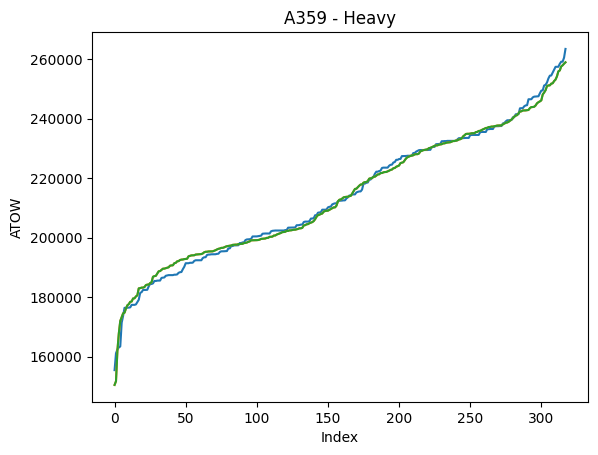

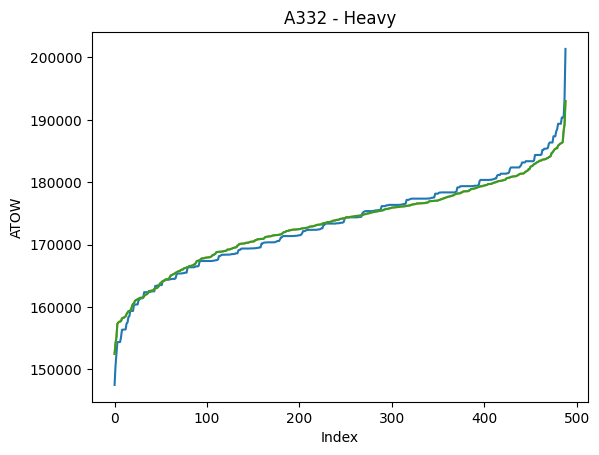

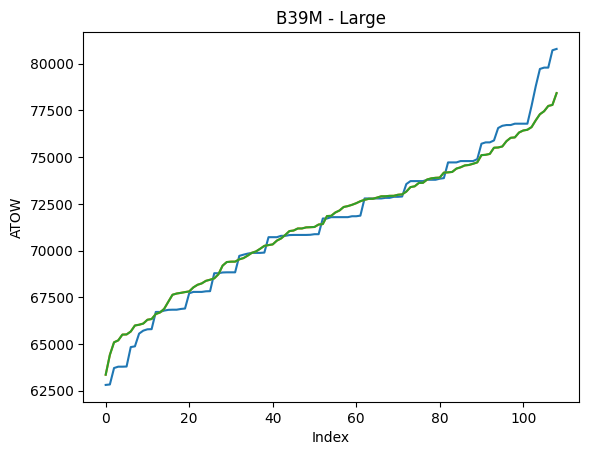

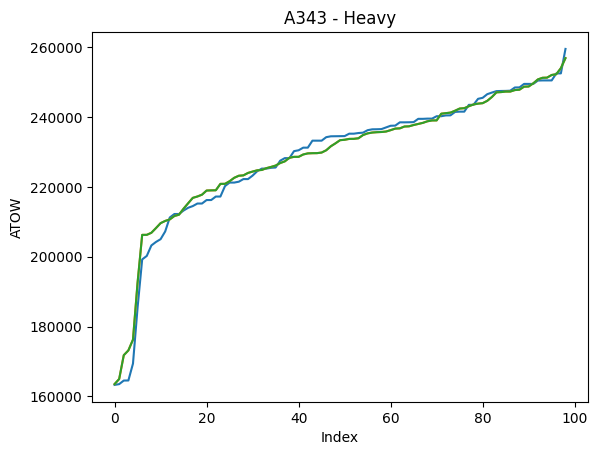

In [101]:
for aircraft_type in aircraft_types:
    flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights.shape)
    X_val_reset = X_val.reset_index()
    indices = X_val_reset[X_val_reset['aircraft_type'] == aircraft_type].index
    # print(y_val.iloc[indices])
    sorted_y_val = np.sort(y_val.iloc[indices].to_numpy())
    if y_pred.iloc[indices].shape[0] <= 1:
        continue
    sorted_y_pred = np.sort(y_pred.iloc[indices].squeeze().to_numpy())
    sorted_y_quant = np.sort(y_quant.iloc[indices].squeeze().to_numpy())
    plt.figure()
    plt.plot(sorted_y_val)
    plt.plot(sorted_y_pred)
    plt.plot(sorted_y_quant)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.title('%s - %s' % (aircraft_type, weight_type))

In [8]:
submission_set_updated['tow'] = submission['tow']
submission_set_updated.head()

callsign  adep  ades aircraft_type wtc  \
0  3b3de0f3ad0ee192513995c02f7bf7cf  LTFJ  LFLL          B738   M   
1  e06dd03d4a879ca37d9e18c1bd7cad16  EBBR  KJFK          A333   H   
2  2d3b1c962c78c4ebeef11bcd51b9e94c  KMIA  EGLL          B77W   H   
3  35f7721f68bf85128195547ae38b0f04  EBBR  LEAL          B738   M   
4  eb56918bee9bc5204624186b9bcc4391  LSZH  LFPG          BCS3   M   

                            airline  taxiout_time  flown_distance  \
0  6351ec1b849adacc0cbb3b1313d8d39b          15.0            1122   
1  bdeeef3a675587d530de70a25d7118d2          15.0            3205   
2  5543e4dc327359ffaf5b9c0e6faaf0e1          10.0            3965   
3  f53c55b5cf0cbb3be755bf50df6fa52d           9.0             802   
4  2d5def0a5a844b343ba1b7cc9cb28fa9          11.0             292   

   track_variation_ARR_100  track_variation_DEP_40  ...  Latitude_ades  \
0                95.626012               61.832877  ...         45.726   
1               101.189988               65.739142  ...         40.640   
2                 1.711789               74.068356  ...         51.477   
3               101.738231               51.771476  ...         38.282   
4                68.791836               68.987429  ...         49.013   

   Longitude_ades  Altitude_ades  actual_distance  altitude_difference  \
0           5.091            251      2022.915548                  -61   
1         -73.779              4      5886.430370                  -53   
2          -0.461             25      7108.920003                   22   
3          -0.558             44      1458.405355                  -13   
4           2.550            120       476.291487                 -312   

      bearing  elevation_gradient  adep_geo_cluster  ades_geo_cluster  \
0  293.477205           -0.030154                11                17   
1  291.395141           -0.009004                 6                 1   
2   43.036806            0.003095                12                13   
3  197.753476           -0.008914                 6                19   
4  293.398537           -0.655061                 2                 6   

             tow  
0   69827.618194  
1  214067.060506  
2  223067.395157  
3   66506.315516  
4   51491.613587  

[5 rows x 216 columns]

A320 Large (79761, 216)
B772 Heavy (8322, 216)
A333 Heavy (17011, 216)
B788 Heavy (5960, 216)
A21N Large (23257, 216)
A20N Large (37944, 216)
B738 Large (37495, 216)
B789 Heavy (5734, 216)
A321 Large (29423, 216)
CRJ9 Large (22926, 216)
A319 Large (17578, 216)
B77W Heavy (9162, 216)
BCS3 Large (11936, 216)
AT76 Large (6897, 216)
E190 Large (2105, 216)
B763 Heavy (1190, 216)
BCS1 Large (4649, 216)
E195 Large (24914, 216)
B38M Large (12330, 216)
B739 Large (1793, 216)
B737 Large (3627, 216)


C:\Users\rudog\AppData\Local\Temp\ipykernel_44420\65724607.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


A359 Heavy (1725, 216)
A332 Heavy (2241, 216)
B39M Large (542, 216)
A343 Heavy (480, 216)
A310 Heavy (2, 216)
B752 Large (6, 216)
B773 Heavy (1, 216)
C56X Small+ (1, 216)
E290 Large (1, 216)


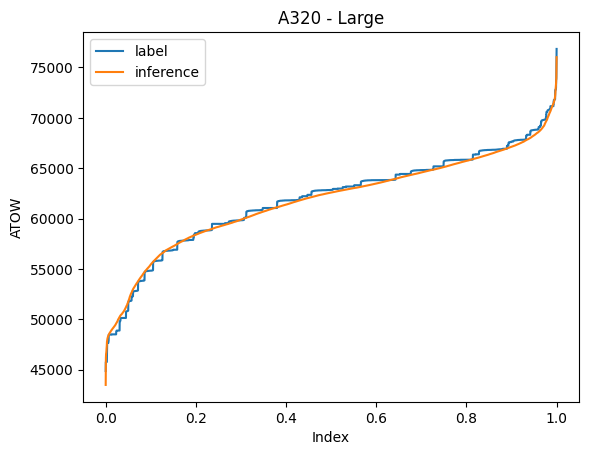

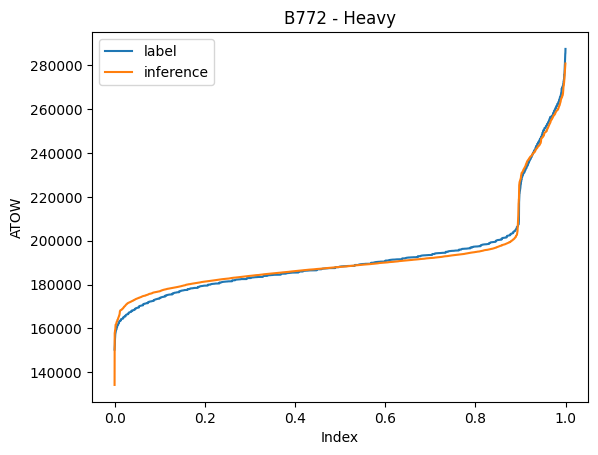

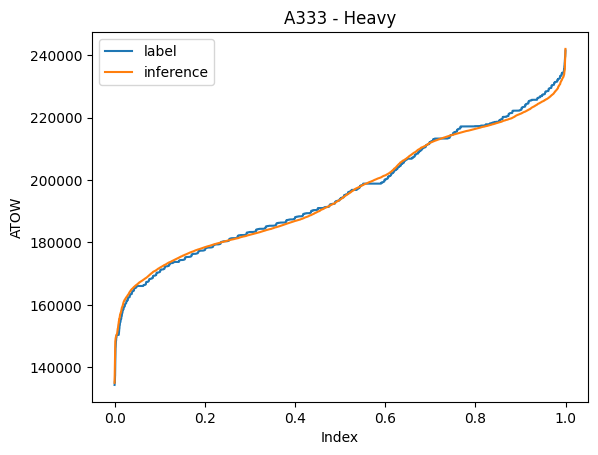

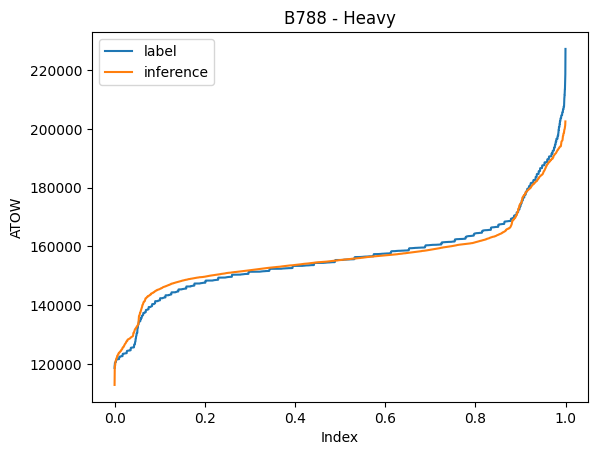

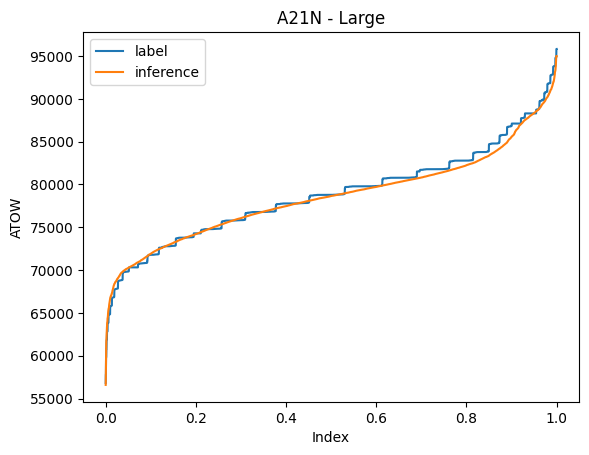

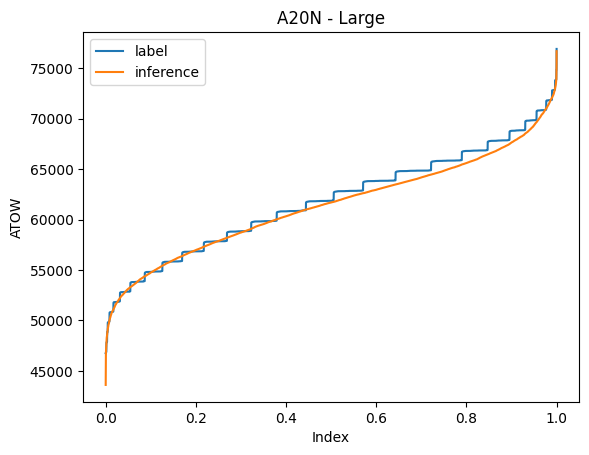

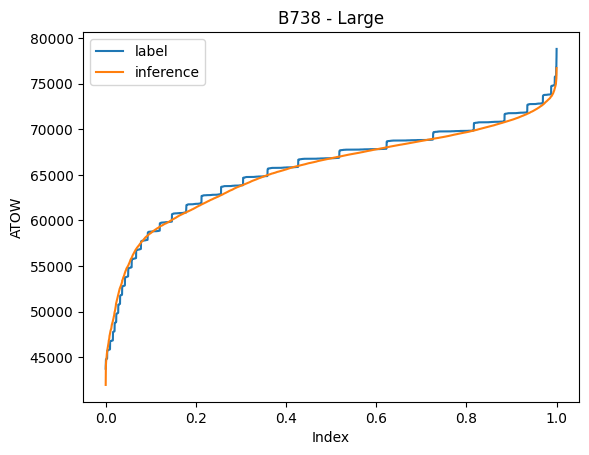

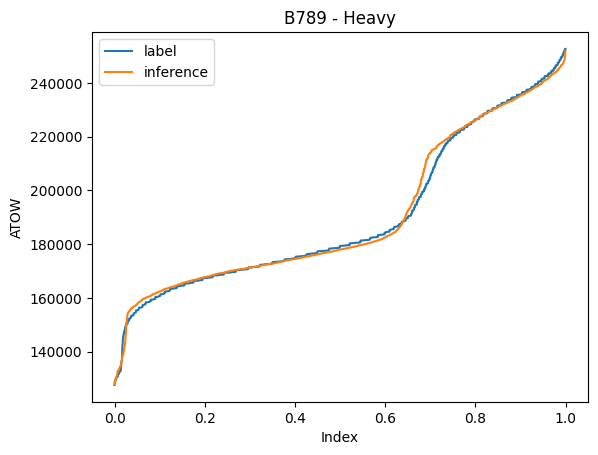

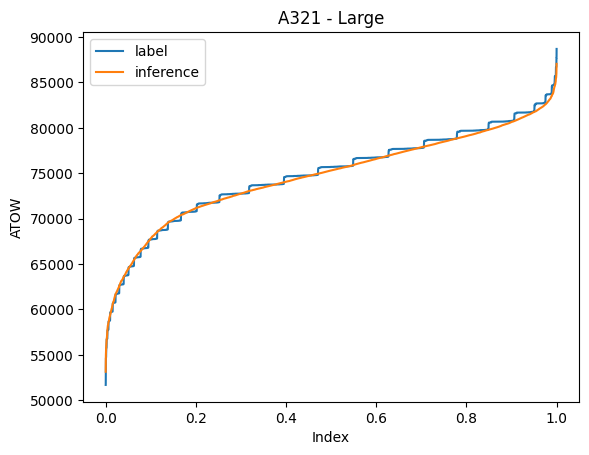

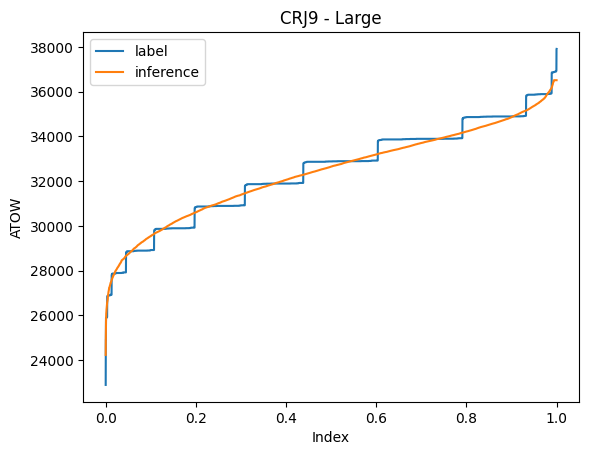

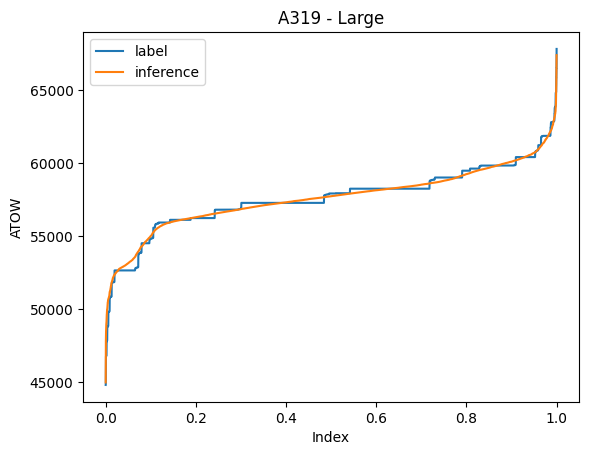

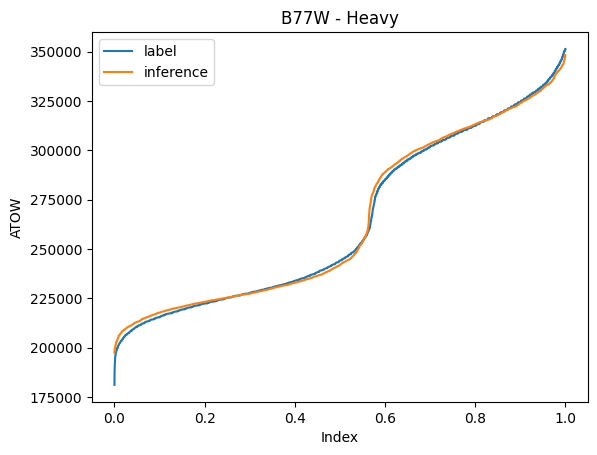

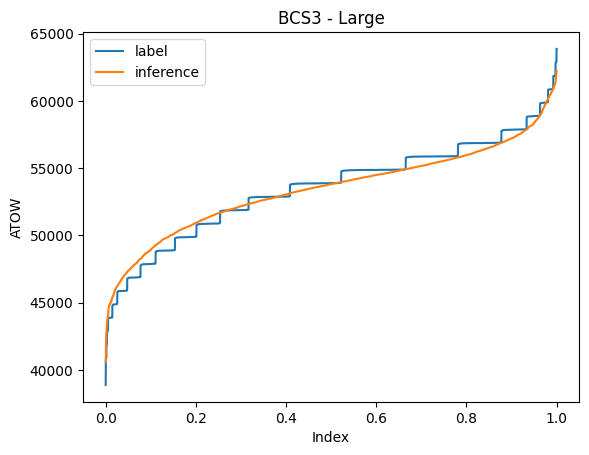

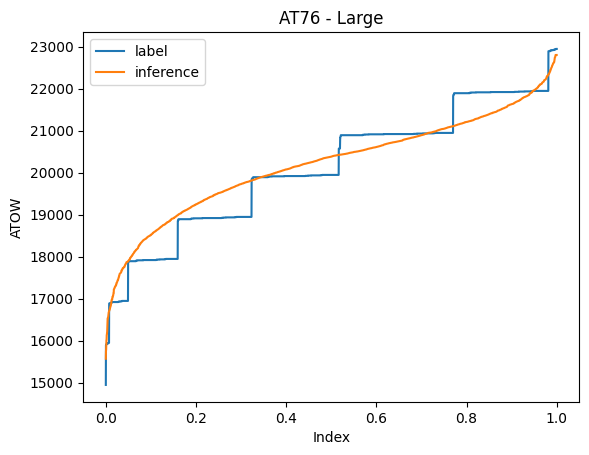

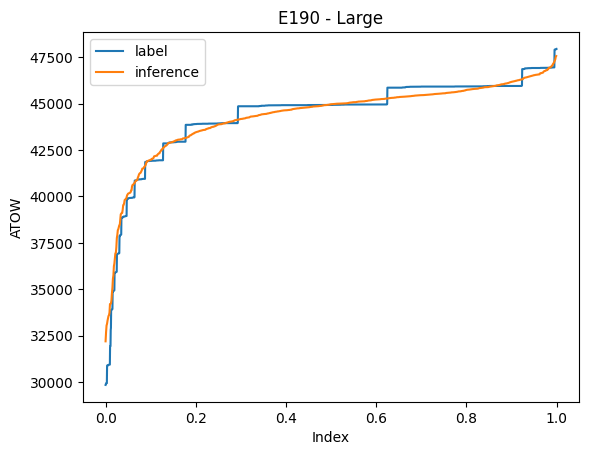

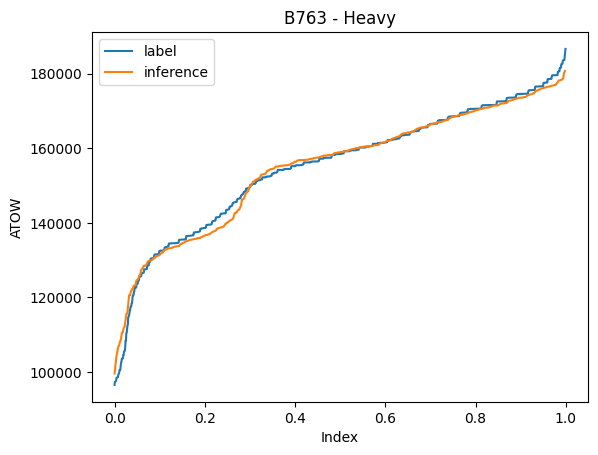

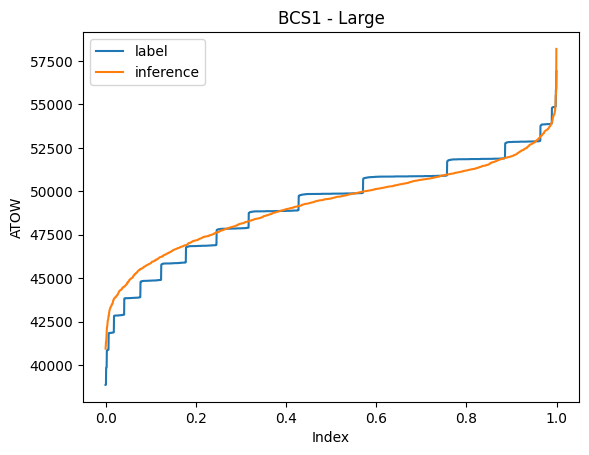

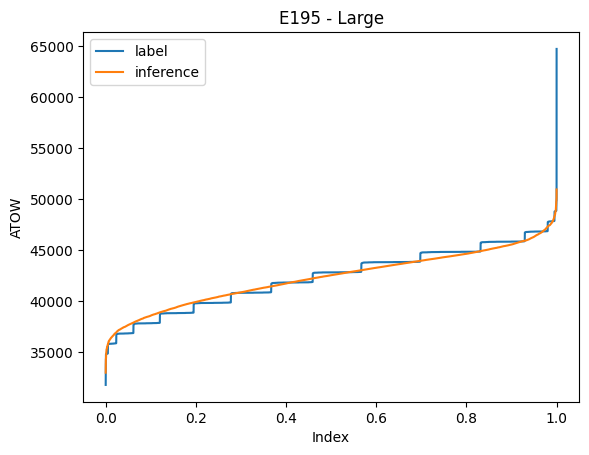

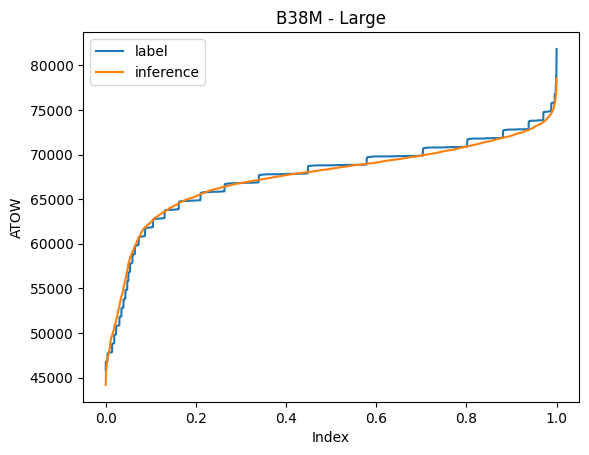

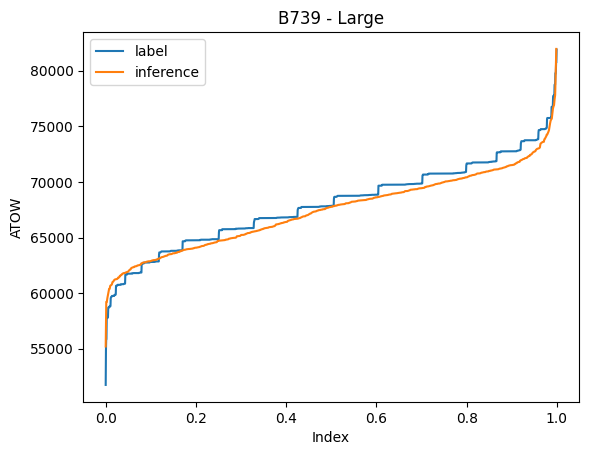

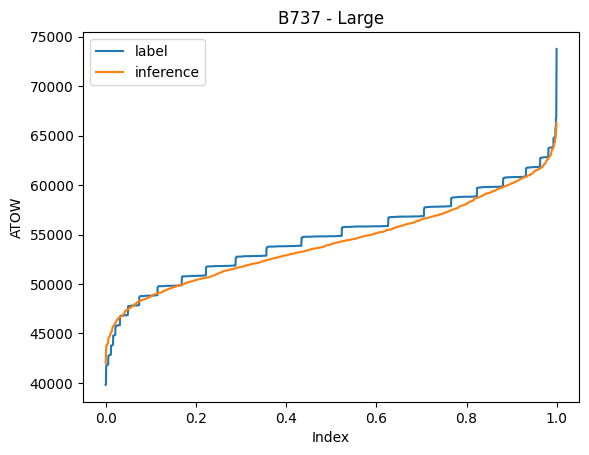

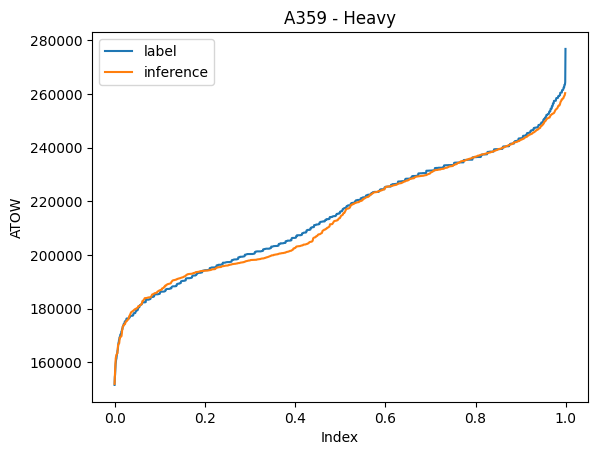

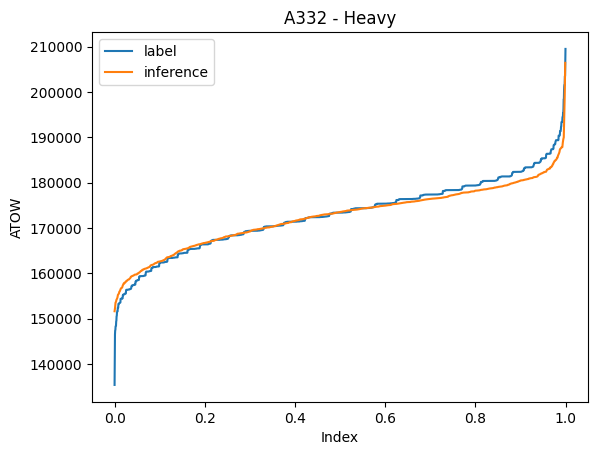

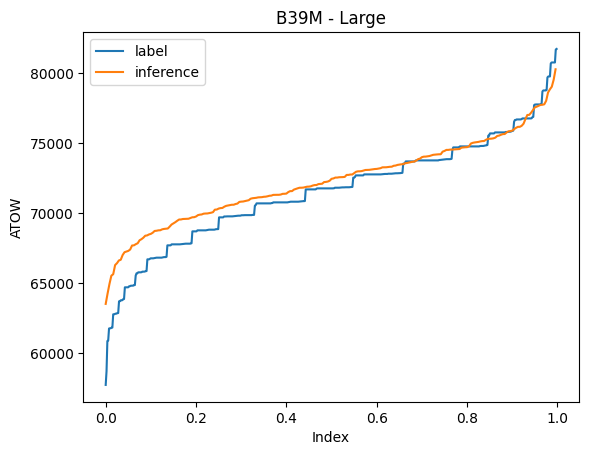

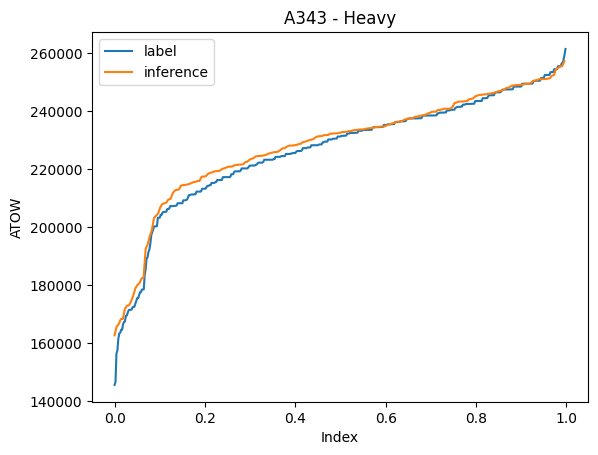

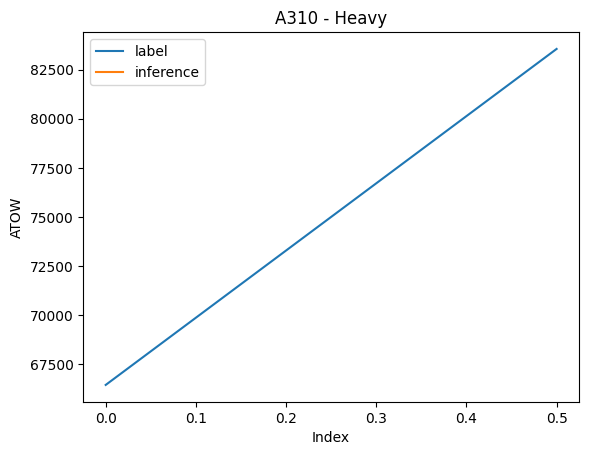

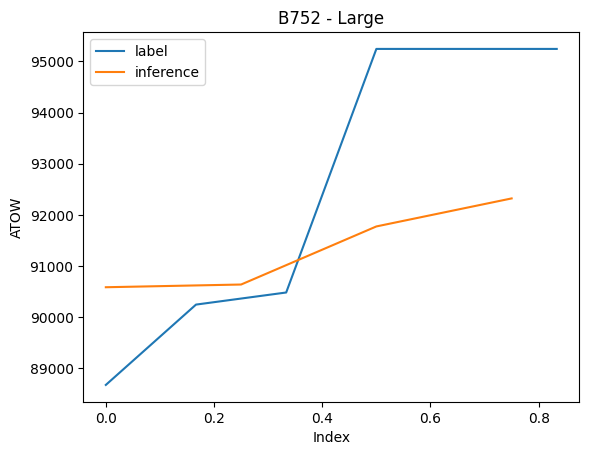

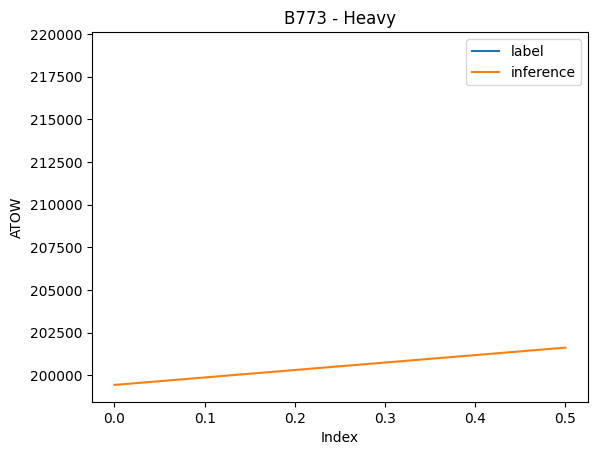

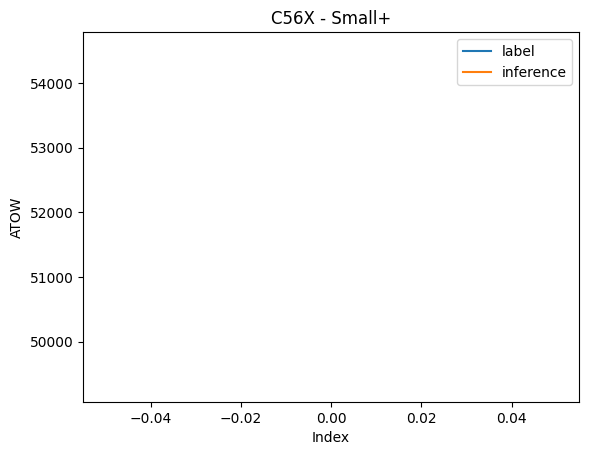

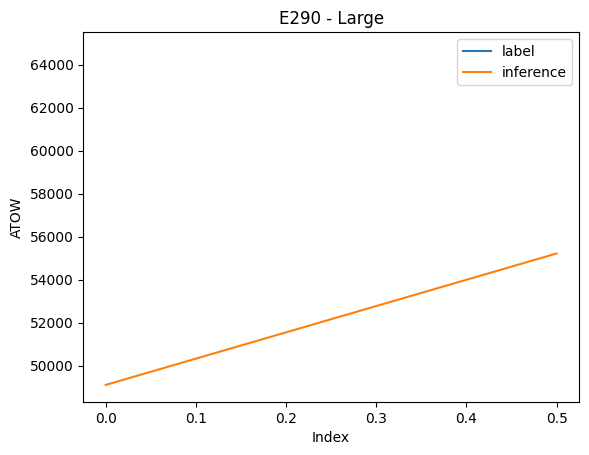

In [9]:
for aircraft_type in aircraft_types:
    flights_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights_challenge.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights_challenge.shape)
    sorted_tows_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_challenge = sorted_tows_challenge.shape[0]
    sorted_tows_submission = submission_set_updated[submission_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_submission = sorted_tows_submission.shape[0]
    plt.figure()
    plt.plot(np.array(range(num_tows_challenge))/num_tows_challenge, sorted_tows_challenge)
    plt.plot(np.array(range(num_tows_submission))/num_tows_submission, sorted_tows_submission)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.legend(['label', 'inference'])
    plt.title('%s - %s' % (aircraft_type, weight_type))
    plt.savefig('%s-%s.png' % (aircraft_type, weight_type), format='png')
    # print(first_row)

In [ ]:
def quantize_tow(row):
    if row['aircraft_type'] != 'AT76':
        return row
    if row['FAA_Weight'] == 'Heavy':
        return row
    aircraft_type = row['aircraft_type']
    flights_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    tow = row['tow']
    tows = flights_challenge['tow'].to_numpy()
    inearest = np.argmin(np.abs(tows - tow))
    row['tow'] = tows[inearest]
    return row

submission_set_quantized = submission_set_updated.copy()

tqdm.pandas()

submission_set_quantized = submission_set_quantized.progress_apply(quantize_tow, axis=1)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# print(aircraft_types)

# knn_dict = dict()

# for aircraft_type in aircraft_types:
#     knn = KNeighborsClassifier(n_neighbors=1)  # You can adjust k here
#     flights = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
#     tows = flights['tow'].to_numpy()
#     X = tows.reshape(-1, 1)
#     print(X)
#     y = tows.reshape(-1, 1)
#     knn.fit(X, y)
#     knn_dict[aircraft_type] = knn

In [ ]:
for aircraft_type in aircraft_types:
    if aircraft_type != 'AT76':
        continue
    flights_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]
    first_row = flights_challenge.iloc[0]
    weight_type = first_row['FAA_Weight']
    print(aircraft_type, weight_type, flights_challenge.shape)
    sorted_tows_challenge = challenge_set_updated[challenge_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_challenge = sorted_tows_challenge.shape[0]
    sorted_tows_submission = submission_set_updated[submission_set_updated['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    num_tows_submission = sorted_tows_submission.shape[0]
    sorted_tows_quantized = submission_set_quantized[submission_set_quantized['aircraft_type'] == aircraft_type]['tow'].sort_values().to_numpy()
    plt.figure()
    plt.plot(np.array(range(num_tows_challenge))/num_tows_challenge, sorted_tows_challenge)
    plt.plot(np.array(range(num_tows_submission))/num_tows_submission, sorted_tows_submission)
    plt.plot(np.array(range(num_tows_submission))/num_tows_submission, sorted_tows_quantized)
    plt.xlabel('Index')
    plt.ylabel('ATOW')
    plt.title('%s - %s' % (aircraft_type, weight_type))
    # print(first_row)

In [ ]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = submission_set_quantized['tow']
dft0[['flight_id', 'tow']].to_csv('catboost_quantized.csv', index=False)

In [ ]:
challenge_set_original = pd.read_csv('./data/challenge_set.csv')

In [ ]:
challenge_set_original = challenge_set_original.sort_values('callsign')

In [ ]:
challenge_set_original[['callsign', 'tow']]

In [ ]:
from catboost import CatBoostRegressor, Pool, metrics
from sklearn.model_selection import train_test_split

model = CatBoostRegressor()

In [ ]:
model.load_model('catboost_all.cbm')

In [ ]:
df_test = pd.read_csv("./data/submission_set_updated_v18.csv")
df_test.head()

In [ ]:
X_test = df_test.drop('tow', axis=1)

In [ ]:
X_test = X_test.drop('callsign', axis=1)
y_pred = model.predict(X_test)
y_test = y_pred

In [ ]:
y_test

In [ ]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
print(dft0)

In [ ]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = y_test
dft0[['flight_id', 'tow']].to_csv('catboost.csv', index=False)

In [ ]:
submission_dataset = df_test
submission_dataset['tow'] = y_pred
# submission_dataset.head()
pd.set_option('display.max_rows', None)
# print(submission_dataset.T)
pd.reset_option('display.max_rows')
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())
mask = (submission_dataset['tow'] > submission_dataset['MTOW_kg'])
submission_dataset.loc[mask, 'tow'] = submission_dataset.loc[mask, 'MTOW_kg']
print((submission_dataset['tow'] > submission_dataset['MTOW_kg']).sum())

In [ ]:
dft0 = pd.read_csv('./data/final_submission_set.csv')
dft0['tow'] = submission_dataset['tow']
dft0[['flight_id', 'tow']].to_csv('catboost_sat.csv', index=False)